In [218]:
#Project 1 Final code

from pandas import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import requests
import time
from us import states
from config import gkey
import gmaps
import scipy.stats as stats
from scipy.stats import pareto
import scipy
import scipy.stats
import itertools
from pandas.plotting import table 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [317]:
#Getting the data in a usable form.

# Keeps first row of header and drops the other 2 header rows.
# Drops the blank rows and the total row since it is redundant.
# Fillna(0) and replace.({'**': 0}) replaced NaN and ** values with zeros.


Florida_data= pd.read_excel('Resources/16zp10fl.xls', sheetname='Sheet1', header=3)
Florida_data=Florida_data.drop(Florida_data.index[0:3])
Florida_data=Florida_data.rename(columns= {"ZIP\ncode [1]": "Zip Code"})
Florida_data=Florida_data.dropna(how="all")
Florida_data=Florida_data.dropna(subset=["Size of adjusted gross income"])
Florida_data=Florida_data.fillna(0)
Florida_data=Florida_data.replace({'**': 0})
    
    
# Rename the income brackets.    
Florida_data["Size of adjusted gross income"]= \
Florida_data["Size of adjusted gross income"].replace({ \
          "$1 under $25,000": "Under 25,000", 
          "$25,000 under $50,000": "25,000 to 50,000",
          "$50,000 under $75,000": "50,000 to 75,000", 
          "$75,000 under $100,000": "75,000 to 100,000",
          "$100,000 under $200,000": "100,000 to 200,000",
          "$200,000 or more": "Over 200,000"
          } 
          )

# Modified Zip Code Excel Sheet.
Florida_zip=pd.read_excel('Resources/Zip_Codes.xlsx')
Florida_zip=Florida_zip.rename(columns={"zip": "Zip Code", "primary_city": "City"})


# Turns Zip Code variable into integers for both sets so it will merge properly.
Florida_data["Zip Code"]=Florida_data["Zip Code"].astype(int)
Florida_zip["Zip Code"]=Florida_zip["Zip Code"].astype(int)


# Merges both on Zip Codes.
Florida_complete=pd.merge(Florida_zip, Florida_data, on='Zip Code')


# Renaming columns - Control + / to uncomment everything
Florida_complete=Florida_complete.rename(columns={                                                  
"Number of volunteer prepared returns [2]": "Total Number of volunteer prepared returns",
"Unnamed: 10": "Number of volunteer income tax assistance prepared returns",                                                  
"Unnamed: 11": "Number of tax counseling for the elderly prepared returns",                                                  
"Unnamed: 12": "Number of volunteer prepared returns with Earned Income Credit",                                                                                                   
"Number of elderly returns [3]": "Number of elderly returns",                                                  
"Adjusted gross income (AGI) [4]": "Adjusted gross income (AGI)",                                                  
"Total income": "Total income: Number of returns",                                                  
"Unnamed: 18": "Total income: Amount",                                                  
"Salaries and wages in AGI": "Salaries and wages in AGI: Number of returns",                                                  
"Unnamed: 20": "Salaries and wages in AGI: Amount",                                                  
"Taxable interest": "Taxable interest: Number of returns",                                                  
"Unnamed: 22": "Taxable interest: Amount",                                                  
"Ordinary dividends": "Ordinary dividends: Number of returns",                                                  
"Unnamed: 24": "Ordinary dividends: Amount",                                                  
"Qualified dividends [5]": "Qualified dividends: Number of returns",                                                  
"Unnamed: 26": "Qualified dividends: Amount",                                                  
"State and local income tax refunds\n": "State and local income tax refunds: Number of returns",                                                  
"Unnamed: 28": "State and local income tax refunds: Number of returns",                                                  
"Business or profession\net income": "Business or profession net income: Number of returns",                                                  
"Unnamed: 30": "Business or profession net income: Amount",
"Net capital gain (less loss) in AGI": "Net capital gain in AGI: Number of returns",                                                  
"Unnamed: 32": "Net capital gain in AGI: Amount",                                                  
"Taxable individual retirement\narrangement distributions": "Taxable individual retirement arrangement distributions: Number of returns",                                                  
"Unnamed: 34": "Taxable individual retirement arrangement distributions: Amount",                                                  
"Pensions and annuities in AGI": "Pensions and annuities in AGI: Number of returns",                                                  
"Unnamed: 36": "Pensions and annuities in AGI: Amount",                                                  
"Number of \nfarm returns": "Number of farm returns",
"Business or profession\nnet income (less loss)":"Business or profession net income: Number of returns",
"Unemployment compensation [6]": "Unemployment compensation: Number of returns",
"Unnamed: 39": "Unemployment compensation: Amount",
"Taxable Social Security benefits": "Taxable Social Security benefits: Number of returns",                                                  
"Unnamed: 41": "Taxable Social Security benefits: Amount",                                                  
"Partnership/S-corp net income (less loss)": "Partnership/S-corp net income: Number of returns",                                                  
"Unnamed: 43": "Partnership/S-corp net income: Amount",                                                  
"Total statuory adjustments": "Total statuory adjustments: Number of returns",                                                  
"Unnamed: 45": "Total statuory adjustments: Amount",                                                  
"Educator expenses": "Educator expenses: Number of returns",                                                  
"Unnamed: 47": "Educator expenses: Amount",                                                  
"Self-employed (Keogh) retirement plans": "Self-employed (Keogh) retirement plans: Number of returns",                                                  
"Unnamed: 49": "Self-employed (Keogh) retirement plans: Amount",                                                  
"Self-employed health insurance deduction": "Self-employed health insurance deduction: Number of returns",
"Unnamed: 51": "Self-employed health insurance deduction: Amount",                                                  
"Individual retirement arrangement payments": "Individual retirement arrangement payments: Number of returns",                                                  
"Unnamed: 53": "Individual retirement arrangement payments: Amount",                                                  
"Student loan interest deduction": "Student loan interest deduction: Number of returns",                                                  
"Unnamed: 55": "Student loan interest deduction: Amount",                                                  
"Tuition and fees deduction": "Tuition and fees deduction: Number of returns",                                                  
"Unnamed: 57": "Tuition and fees deduction: Amount",                                                  
"Domestic production activities deduction": "Domestic production activities deduction: Number of returns",                                                  
"Unnamed: 59": "Domestic production activities deduction: Amount",                                                  
"Total itemized deductions": "Total itemized deductions: Number of returns",                                                  
"Unnamed: 61": "Total itemized deductions: Amount",
"Unnamed: 62": "Total itemized deductions: Amount of AGI",
"Total medical and dental \nexpenses deduction": "Total medical and dental expenses deduction: Number of returns",
"Unnamed: 64": "Total medical and dental expenses deduction: Amount",                                                  
"State and local income taxes": "State and local income taxes: Number of returns",                                                  
"Unnamed: 66": "State and local income taxes: Amount",                                                  
"State and local general sales taxes": "State and local general sales taxes: Number of returns",                                                  
"Unnamed: 68": "State and local general sales taxes: Amount",                                                  
"Real estate taxes": "Real estate taxes: Number of returns",                                                  
"Unnamed: 70": "Real estate taxes: Amount",                                                  
"Personal property taxes": "Personal property taxes: Number of returns",                                                  
"Unnamed: 72": "Personal property taxes: Amount",                                                  
"Total taxes paid": "Total taxes paid: Number of returns",                                                  
"Unnamed: 74": "Total taxes paid: Amount",
"Home mortgage interest paid ": "Home mortgage interest paid: Number of returns",
"Unnamed: 76": "Home mortgage interest paid: Amount",                                                  
"Home mortgage interest paid \nfrom personal seller": "Home mortgage interest paid from personal seller: Number of returns",                                                  
"Unnamed: 78": "Home mortgage interest paid from personal seller: Amount",                                                  
"Deductible points": "Deductible points: Number of returns",                                                  
"Unnamed: 80": "Deductible points: Amount",                                                  
"Qualified mortgage insurance premiums": "Qualified mortgage insurance premiums: Number of returns",                                                  
"Unnamed: 82": "Qualified mortgage insurance premiums: Amount",                                                  
"Investment interest paid": "Investment interest paid: Number of returns",                                                  
"Unnamed: 84": "Investment interest paid: Amount",                                                  
"Total charitable contributions": "Total charitable contributions: Number of returns",                                                  
"Unnamed: 86": "Total charitable contributions: Amount",
"Net limited miscellaneous deduction": "Net limited miscellaneous deduction: Number of returns",
"Unnamed: 88": "Net limited miscellaneous deduction: Amount",                                                  
"Other non-limited \nmiscellaneous deduction": "Other non-limited miscellaneous deduction: Number of returns",                                                  
"Unnamed: 90": "Other non-limited miscellaneous deduction: Amount",                                                  
"Taxable income": "Taxable income: Number of returns",                                                  
"Unnamed: 92": "Taxable income: Amount",                                                  
"Income tax before credits": "ncome tax before credits: Number of returns",                                                  
"Unnamed: 94": "ncome tax before credits: Amount",                                                  
"Alternative minimum tax": "Alternative minimum tax: Number of returns",                                                  
"Unnamed: 96": "Alternative minimum tax: Amount",                                                  
"Excess advance \npremium tax credit repayment": "Excess advance premium tax credit repayment: Number of returns",                                                  
"Unnamed: 98": "Excess advance premium tax credit repayment: Amount",
"Total tax credits": "Total tax credits: Number of returns",
"Unnamed: 100": "Total tax credits: Amount",                                                  
"Foreign tax credit": "Foreign tax credit: Number of returns",                                                  
"Unnamed: 102": "Foreign tax credit: Amount",                                                  
"Child and dependent care credit": "Child and dependent care credit: Number of returns",                                                  
"Unnamed: 104": "Child and dependent care credit: Amount",                                                  
"Nonrefundable education credit": "Nonrefundable education credit: Number of returns",                                                  
"Unnamed: 106": "Nonrefundable education credit: Amount",                                                  
"Retirement savings contributions credit": "Retirement savings contributions credit: Number of returns",                                                  
"Unnamed: 108": "Retirement savings contributions credit: Amount",                                                  
"Child tax credit": "Child tax credit: Number of returns",                                                  
"Unnamed: 110": "Child tax credit: Amount",
"Residential energy tax credit": "Residential energy tax credit: Number of returns",
"Unnamed: 112": "Residential energy tax credit: Amount",                                                  
"Self-employment tax": "Self-employment tax: Number of returns",                                                  
"Unnamed: 114": "Self-employment tax: Amount",                                                  
"Total premium tax credit": "Total premium tax credit: Number of returns",                                                  
"Unnamed: 116": "Total premium tax credit: Amount",                                                  
"Advance premium tax credit": "Advance premium tax credit: Number of returns",                                                  
"Unnamed: 118": "Advance premium tax credit: Amount",                                                  
"Health care individual \nresponsibility payment": "Health care individual responsibility payment: Number of returns",           
"Unnamed: 120": "Health care individual responsibility payment: Amount",                                                  
"Total tax payments": "Total tax payments: Number of returns",            
"Unnamed: 122": "Total tax payments: Amount",                                                  
"Earned income credit [7]": "Earned income credit: Number of returns",                                                  
"Unnamed: 124": "Earned income credit: Amount",
"Excess earned income credit \n(refundable) [8]": "Excess earned income credit (refundable): Number or returns",
"Unnamed: 126": "Excess earned income credit (refundable): Amount",                                                  
"Additional child tax credit": "Additional child tax credit: Number of returns",                                                  
"Unnamed: 128": "Additional child tax credit: Amount",                                                  
"Refundable education credit": "Refundable education credit: Number of returns",                                                  
"Unnamed: 130": "Refundable education credit: Amount",                                                  
"Net premium tax credit": "Net premium tax credit: Number of returns",                                                  
"Unnamed: 132": "Net premium tax credit: Amount",                                                  
"Income tax [9]": "Income tax: Number of returns",                                                  
"Unnamed: 134": "Income tax: Amount",                                                  
"Total tax liability [10]": "Total tax liability: Number of returns",                                                  
"Unnamed: 136": "Total tax liability: Amount",
"Total additional Medicare tax": "Total additional Medicare tax: Number of returns",
"Unnamed: 138": "Total additional Medicare tax: Amount",                                                  
"Net investment income tax": "Net investment income tax: Number of returns",                                                  
"Unnamed: 140": "Net investment income tax: Amount",                                                  
"Tax due at time of filing [11]": "Tax due at time of filing: Number of returns",                                                  
"Unnamed: 142": "Tax due at time of filing: Amount",                                                  
"Overpayments refunded [12]": "Overpayments refunded: Number of returns",                                                  
"Unnamed: 144": "Overpayments refunded: Amount",                                                  
}
)

# Florida complete contains zip codes and cities.
# Drops zip codes to just yield cities.
Florida_cities=Florida_complete
Florida_cities=Florida_cities.drop("Zip Code", axis=1)

In [318]:
# Florida_cities is the main dataframe is use.
# Zip codes are dropped as they are not needed for all questions.
# Data is grouped by City and Size of adjusted gross income for analytical purposes.

Florida_cities=Florida_complete
Florida_cities=Florida_cities.drop("Zip Code", axis=1)
Florida_cities=Florida_cities.groupby([ \
                "City", "Size of adjusted gross income"], sort=False).sum().reset_index()



#Florida_cities.to_html("Florida_cities.html")
Florida_cities["Size of adjusted gross income"]=Florida_cities["Size of adjusted gross income"].str.wrap(1000)
Florida_cities.head(10)

,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fleming Island,"Under 25,000",3470.0,2780.0,340.0,300.0,1200.0,3340.0,750.0,80,...,1670,1372,0,0,0,0,300,231,2890,4093
1,Fleming Island,"25,000 to 50,000",2200.0,1110.0,620.0,390.0,870.0,4020.0,1210.0,30,...,1880,5091,0,0,0,0,380,626,1780,4536
2,Fleming Island,"50,000 to 75,000",1860.0,640.0,890.0,270.0,830.0,4100.0,1350.0,50,...,1770,9734,0,0,0,0,470,1037,1340,4073
3,Fleming Island,"75,000 to 100,000",1520.0,280.0,1080.0,120.0,670.0,3870.0,1270.0,0,...,1510,13047,0,0,0,0,430,1147,1060,3588
4,Fleming Island,"100,000 to 200,000",2930.0,240.0,2580.0,110.0,1320.0,8400.0,2900.0,0,...,2930,52720,0,0,0,0,1120,4194,1730,6898
5,Fleming Island,"Over 200,000",990.0,50.0,900.0,30.0,640.0,3040.0,1150.0,0,...,990,83779,440,537,450,898,500,12766,400,3984
6,Branford,"Under 25,000",870.0,480.0,170.0,200.0,350.0,1390.0,430.0,30,...,410,372,0,0,0,0,70,48,730,1669
7,Branford,"25,000 to 50,000",580.0,230.0,220.0,100.0,250.0,1190.0,390.0,0,...,470,1164,0,0,0,0,70,92,500,1431
8,Branford,"50,000 to 75,000",300.0,80.0,190.0,40.0,170.0,660.0,180.0,0,...,280,1569,0,0,0,0,60,129,230,602
9,Branford,"75,000 to 100,000",160.0,30.0,140.0,0.0,90.0,430.0,130.0,0,...,160,1326,0,0,0,0,40,113,120,412


In [319]:
# Florida_cities but indexed for display purposes.

Florida_cities_indexed=Florida_complete
Florida_cities_indexed=Florida_cities_indexed.drop("Zip Code", axis=1)
Florida_cities_indexed=Florida_cities_indexed.groupby([\
                        "City", "Size of adjusted gross income"], sort=False).sum()


    
for col in Florida_cities_indexed.columns:
    if "Amount" in col:
        Florida_cities_indexed[col]= Florida_cities_indexed[col]*1000
        Florida_cities_indexed[col]= \
            Florida_cities_indexed[col].astype(float).map("${:0.0f}".format)

        
Florida_cities_indexed_columns=[col for col in Florida_cities_indexed.columns if not 'Amount' in col]
       
for col1 in Florida_cities_indexed.columns:
    if col1==Florida_cities_indexed_columns:
        Florida_cities_indexed[col1]= \
            Florida_cities_indexed[col1].astype(float).map("{:0,.0f}".format)
        
    
Florida_cities_indexed_display=Florida_cities_indexed.copy()
Florida_cities_indexed_display

Number of returns  Number of single returns  Number of joint returns  Number of head of household returns  Number with paid preparer's signature  Number of exemptions  Number of dependents  Total Number of volunteer prepared returns  Number of volunteer income tax assistance prepared returns  Number of tax counseling for the elderly prepared returns  ...  Total tax liability: Number of returns  Total tax liability: Amount  Total additional Medicare tax: Number of returns  Total additional Medicare tax: Amount  Net investment income tax: Number of returns  Net investment income tax: Amount Tax due at time of filing: Number of returns  Tax due at time of filing: Amount Overpayments refunded: Number of returns  Overpayments refunded: Amount
City           Size of adjusted gross income                                                                                                                                                                                                                                                                                                                                                                   ...                                                                                                                                                                                                                                                                                                                                                                                                       
Fleming Island Under 25,000                   3470.0             2780.0                    340.0                    300.0                                1200.0                                 3340.0                750.0                 80                                          30                                                          40                                                         ...  1670                                    $1372000                     0                                                 $0                                     0                                             $0                                 300                                          $231000                            2890                                     $4093000                     
               25,000 to 50,000               2200.0             1110.0                    620.0                    390.0                                870.0                                  4020.0                1210.0                30                                          0                                                           30                                                         ...  1880                                    $5091000                     0                                                 $0                                     0                                             $0                                 380                                          $626000                            1780                                     $4536000                     
               50,000 to 75,000               1860.0             640.0                     890.0                    270.0                                830.0                                  4100.0                1350.0                50                                          20                                                          30                                                         ...  1770                                    $9734000                     0                                                 $0                                     0                                             $0                                 470                                          $1037000                           1340                                     $4073000                     
               75,000 to 100,000              1520.0             280.0      

In [235]:
# Question 1.
# Top 5 cities for lower income bracket returns.
# Cities are: Jacksonville, Orlando, Tampa, Miami and Fort Lauderdale

Lower_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>100000) & (Florida_cities["Size of adjusted gross income"]=="Under $25,000"),:]

Lower_bracket_display=Lower_bracket.copy()

for col in Lower_bracket_display.columns:
    if "Amount" in col:
        Lower_bracket_display[col]= Lower_bracket_display[col]*1000
        Lower_bracket_display[col]= \
            Lower_bracket_display[col].astype(float).map("${:0.0f}".format)
        


Lower_bracket_display

,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
378,Jacksonville,"Under $25,000",160460.0,101290.0,15380.0,40700.0,64860.0,246290.0,88030.0,6580,...,80120,$75216000,0,$0,0,$0,12440,$10675000,141830,$352045000
1170,Orlando,"Under $25,000",215530.0,139070.0,21420.0,51880.0,111700.0,328410.0,116770.0,3190,...,110920,$106510000,0,$0,0,$0,18660,$16946000,188750,$491770000
1374,Miami,"Under $25,000",418500.0,267380.0,48950.0,96550.0,295380.0,625310.0,202240.0,6150,...,247200,$258130000,0,$0,0,$0,65450,$59288000,335280,$866524000
1392,Fort Lauderdale,"Under $25,000",162930.0,108500.0,16790.0,35030.0,111560.0,235410.0,76510.0,2660,...,87460,$88128000,0,$0,0,$0,20420,$19485000,132100,$336029000
1656,Tampa,"Under $25,000",150780.0,97700.0,14460.0,36420.0,67470.0,227510.0,79240.0,2710,...,77160,$75672000,0,$0,0,$0,14690,$13683000,129790,$320303000


In [6]:
# Question 1 Heat Map for zip codes
# Orlando, Tampa and Miami are the hottest cities on the heat map.

Zip_coord=pd.read_csv('Resources/zipcode.csv', encoding="utf-8")
Zip_coord=Zip_coord[["zip", "latitude", "longitude"]]
Zip_coord=Zip_coord.rename(columns={ \
            "zip": "Zip Code", "latitude": "Latitude", "longitude": "Longitude"})

Lower_bracket_zip=Florida_complete.loc[ \
                    Florida_complete["Size of adjusted gross income"]=="Under $25,000",:]

Lower_bracket_zip_combined=pd.merge(Lower_bracket_zip, Zip_coord, on="Zip Code")

Lower_bracket_zip_combined

gmaps.configure(api_key=gkey)

Locations=Lower_bracket_zip_combined[["Latitude", "Longitude"]].astype(float)
Lower_bracket_weights=Lower_bracket_zip_combined["Number of returns"].astype(float)

fig=gmaps.figure()

Lower_bracket_zip_map=gmaps.heatmap_layer(Locations, weights=Lower_bracket_weights, 
                                 dissipating=False, max_intensity=500000,
                                 point_radius = 1)

fig.add_layer(Lower_bracket_zip_map)
fig

Figure(layout=FigureLayout(height='420px'))

In [237]:
# Question 2.
# Middle income on a heat map.
# Same top 5 cities as Question 1.

Middle_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>75000) & (Florida_cities["Size of adjusted gross income"]!="Under $25,000") & \
(Florida_cities["Size of adjusted gross income"]!="$100,000 to $200,000") & \
(Florida_cities["Size of adjusted gross income"]!="Over $200,000"),:]

Middle_bracket=Middle_bracket.groupby(["City"]).sum().reset_index()

Middle_bracket_display=Middle_bracket.copy()

for col in Middle_bracket_display.columns:
    if "Amount" in col:
        Middle_bracket_display[col]= Middle_bracket_display[col]*1000
        Middle_bracket_display[col]= \
            Middle_bracket_display[col].astype(float).map("${:0.0f}".format)
        
Middle_bracket_display

,City,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,Number of volunteer income tax assistance prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fort Lauderdale,97640.0,52420.0,18550.0,23630.0,62610.0,171550.0,55880.0,1040,910,...,81500,$213519000,0,$0,0,$0,13910,$26137000,82120,$239803000
1,Jacksonville,112330.0,57630.0,23410.0,26950.0,41560.0,205360.0,70000.0,4220,2620,...,92540,$244146000,0,$0,0,$0,14980,$22698000,96470,$261537000
2,Miami,302450.0,146340.0,73030.0,75000.0,209210.0,559510.0,185070.0,2100,1880,...,263630,$920830000,0,$0,0,$0,45360,$112055000,253710,$792141000
3,Orlando,123530.0,64060.0,25630.0,30010.0,58470.0,229090.0,80470.0,1350,560,...,100840,$262053000,0,$0,0,$0,15580,$26694000,107110,$306814000
4,Tampa,93790.0,51390.0,17080.0,22550.0,36860.0,166030.0,55600.0,1440,790,...,78170,$211759000,0,$0,0,$0,12780,$21774000,80130,$214439000


In [8]:
# Question 2 Heat map
# More heat along the I4 corridor.


Zip_coord=pd.read_csv('Resources/zipcode.csv', encoding="utf-8")
Zip_coord=Zip_coord[["zip", "latitude", "longitude"]]
Zip_coord=Zip_coord.rename(columns={ \
            "zip": "Zip Code", "latitude": "Latitude", "longitude": "Longitude"})


Florida_complete_copy=Florida_complete.copy()
Florida_complete_merge=Florida_complete_copy.merge(Zip_coord, on="Zip Code")
Florida_complete_merge



Middle_bracket_zip_combined=Florida_complete_merge.loc[ \
      (Florida_complete_merge["Number of returns"]>0) & 
      (Florida_complete_merge["Size of adjusted gross income"]!="Under $25,000") & 
      (Florida_complete_merge["Size of adjusted gross income"]!="$100,000 to $200,000") & 
      (Florida_complete_merge["Size of adjusted gross income"]!="Over $200,000"),:
      ]



gmaps.configure(api_key=gkey)

Locations=Middle_bracket_zip_combined[["Latitude", "Longitude"]].astype(float)
Middle_bracket_weights=Middle_bracket_zip_combined["Number of returns"].astype(float)

fig=gmaps.figure()

Middle_bracket_zip_map=gmaps.heatmap_layer(Locations, weights=Middle_bracket_weights, 
                                 dissipating=False, max_intensity=500000,
                                 point_radius = 1)



fig.add_layer(Middle_bracket_zip_map)
fig

Figure(layout=FigureLayout(height='420px'))

In [239]:
# Question 3.
# Upper Income on a heat map.
# Same top 5 as Question 2.

Upper_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>30000) & 
(Florida_cities["Size of adjusted gross income"]!="Under $25,000") & \
(Florida_cities["Size of adjusted gross income"]!="$25,000 to $50,000") & \
(Florida_cities["Size of adjusted gross income"]!="$50,000 to $75,000") & \
(Florida_cities["Size of adjusted gross income"]!="$75,000 to $100,000"),:
]



Upper_bracket=Upper_bracket.groupby(["City"]).sum().reset_index()

Upper_bracket_display=Upper_bracket.copy()

for col in Upper_bracket_display.columns:
    if "Amount" in col:
        Upper_bracket_display[col]= Upper_bracket_display[col]*1000
        Upper_bracket_display[col]= \
            Upper_bracket_display[col].astype(float).map("${:0.0f}".format)
        
Upper_bracket_display

,City,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,Number of volunteer income tax assistance prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fort Lauderdale,40260.0,9400.0,27430.0,2870.0,26840.0,98270.0,30620.0,0,0,...,40030,$776018000,460,$140000,30,$11000,13860,$78985000,24330,$119076000
1,Jacksonville,37630.0,5300.0,30420.0,1620.0,18190.0,96250.0,28250.0,30,30,...,37480,$684900000,140,$31000,20,$12000,13640,$61123000,22900,$91721000
2,Miami,94150.0,18410.0,66900.0,7230.0,69470.0,248290.0,87320.0,0,0,...,93790,$5499596000,15890,$35134000,17010,$83997000,37120,$659522000,49930,$426162000
3,Orlando,35470.0,6140.0,27280.0,1840.0,17900.0,93450.0,30770.0,0,0,...,35350,$667780000,320,$88000,20,$23000,12590,$65041000,21940,$96623000
4,Tampa,33300.0,6910.0,24300.0,1850.0,17150.0,83790.0,26210.0,0,0,...,33160,$656830000,350,$108000,30,$15000,12400,$61777000,19780,$85885000


In [10]:
# Question 3 Heat map.
# No surprise that the same top 5 are all hit on the heat map.

Zip_coord=pd.read_csv('Resources/zipcode.csv', encoding="utf-8")
Zip_coord=Zip_coord[["zip", "latitude", "longitude"]]
Zip_coord=Zip_coord.rename(columns={ \
            "zip": "Zip Code", "latitude": "Latitude", "longitude": "Longitude"})


Florida_complete_copy=Florida_complete.copy()
Florida_complete_merge=Florida_complete_copy.merge(Zip_coord, on="Zip Code")
Florida_complete_merge



Upper_bracket_zip_combined=Florida_complete_merge.loc[ \
        (Florida_complete_merge["Number of returns"]>0) & 
        (Florida_complete_merge["Size of adjusted gross income"]!="Under $25000") & 
        (Florida_complete_merge["Size of adjusted gross income"]!="$25000 to $50000") & 
        (Florida_complete_merge["Size of adjusted gross income"]!="$50,000 to $75,000") & 
        (Florida_complete_merge["Size of adjusted gross income"]!="$75,000 to $100,000"),:
        ]



gmaps.configure(api_key=gkey)

Locations=Upper_bracket_zip_combined[["Latitude", "Longitude"]].astype(float)
Upper_bracket_weights=Upper_bracket_zip_combined["Number of returns"].astype(float)

fig=gmaps.figure()

Upper_bracket_zip_map=gmaps.heatmap_layer(Locations, weights=Upper_bracket_weights, 
                                 dissipating=False, max_intensity=500000,
                                 point_radius = 1)



fig.add_layer(Upper_bracket_zip_map)
fig

Figure(layout=FigureLayout(height='420px'))

In [321]:
# Question 4-7 dataframes.
# Retirement information.
# Total =   Pensions and annuities in AGI +
#           Taxable Social Security benefits +
#           Individual retirement arrangement payments

City_tax_test=Florida_cities.groupby(["City"]).sum().reset_index()

Retirement_returns=City_tax_test[[ \
    "City",
    "Pensions and annuities in AGI: Number of returns", 
    "Taxable Social Security benefits: Number of returns",
    "Individual retirement arrangement payments: Number of returns"]
    ]


Retirement_returns["Total"]=( \
Retirement_returns["Pensions and annuities in AGI: Number of returns"] + \
Retirement_returns["Taxable Social Security benefits: Number of returns"] + \
Retirement_returns["Individual retirement arrangement payments: Number of returns"]
)


Retirement_returns=Retirement_returns[["City", "Total"]]


Retirement_amount=City_tax_test[[ \
    "City",
    "Pensions and annuities in AGI: Amount", 
    "Taxable Social Security benefits: Amount",
    "Individual retirement arrangement payments: Amount"]
    ]


Retirement_amount["Total"]=( \
Retirement_amount["Pensions and annuities in AGI: Amount"] + \
Retirement_amount["Taxable Social Security benefits: Amount"] + \
Retirement_amount["Individual retirement arrangement payments: Amount"]
)


Retirement_amount=Retirement_amount[["City", "Total"]]
Retirement_amount["Total"]=Retirement_amount["Total"]*1000


C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [322]:
# Question 4
# Cities with total retirement returns over 50,000.  
# 11 cities total.

High_retire_returns=  \
    Retirement_returns.loc[Retirement_returns["Total"]>50000,:]



High_retire_returns_display=High_retire_returns.copy()
High_retire_returns_display["Total"]= \
High_retire_returns_display["Total"].astype(float).map("{:20,.0f}".format)


High_retire_returns_display= \
    High_retire_returns_display.sort_values(by=['Total'], ascending=False)


High_retire_returns_display

,City,Total
228,Miami,"145,910"
167,Jacksonville,"125,950"
110,Fort Lauderdale,"102,720"
272,Orlando,"93,780"
355,Tampa,"85,050"
245,Naples,"81,150"
332,Sarasota,"64,200"
325,Saint Petersburg,"63,220"
113,Fort Myers,"57,480"
303,Pompano Beach,"57,040"


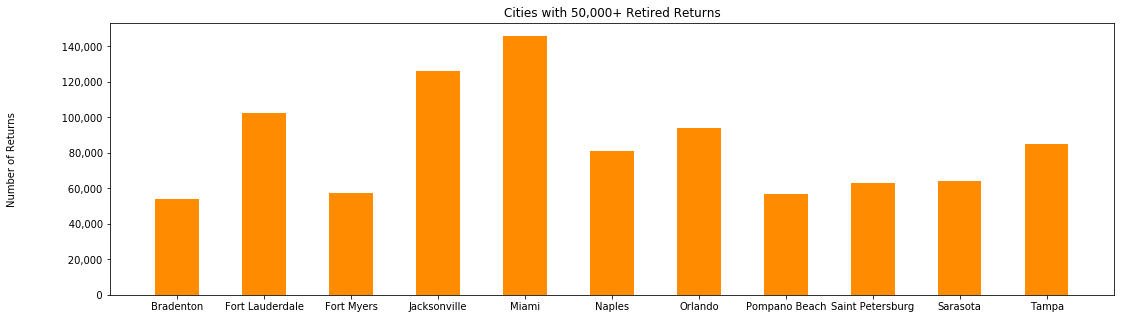

In [13]:
# Question 4 graph.

plt.figure(figsize=(18,5))
High_retire_returns_graph=plt.bar( \
High_retire_returns["City"], High_retire_returns["Total"], color="darkorange", width=0.5)

plt.gca().set_yticklabels(['{:20,.0f}'.format(x) for x in plt.gca().get_yticks()])


plt.title("Cities with 50,000+ Retired Returns")
plt.ylabel("Number of Returns")
plt.savefig("Graphs/Question 4 50000+ Retired Returns")
plt.show()

In [323]:
# Question 5.
# Cities with $100+ million in retirement income. 
# 16 cities in total.

High_retire_amount= \
Retirement_amount.loc[Retirement_amount["Total"]>1000000000,:]
High_retire_amount_display=High_retire_amount.copy()


High_retire_amount_display["Total"]= \
High_retire_amount_display["Total"].astype(float).map("${:20,.0f}".format)



High_retire_amount_display= \
    High_retire_amount_display.sort_values(by=['Total'], ascending=False)

pd.options.display.max_rows=17
High_retire_amount_display

,City,Total
228,Miami,"$ 2,546,845,000"
167,Jacksonville,"$ 2,422,324,000"
245,Naples,"$ 2,092,829,000"
110,Fort Lauderdale,"$ 1,938,618,000"
272,Orlando,"$ 1,563,765,000"
355,Tampa,"$ 1,559,434,000"
332,Sarasota,"$ 1,434,368,000"
113,Fort Myers,"$ 1,306,817,000"
325,Saint Petersburg,"$ 1,217,372,000"
34,Bradenton,"$ 1,181,783,000"


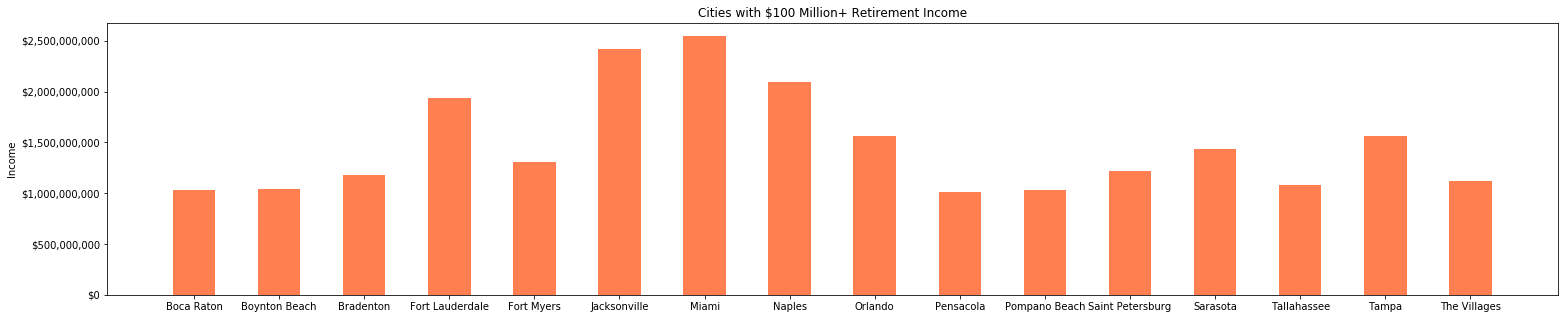

In [15]:
# Question 5 graph.

plt.figure(figsize=(26,5))
High_retire_amount_graph=plt.bar(  \
High_retire_amount["City"], High_retire_amount["Total"], color="coral", width=0.5)


plt.gca().set_yticklabels(['${:0,.0f}'.format(x) for x in plt.gca().get_yticks()])

plt.title("Cities with $100 Million+ Retirement Income")
plt.ylabel("Income")
plt.savefig("Graphs/Question 5 100+ Million Retirement Income")
plt.show()

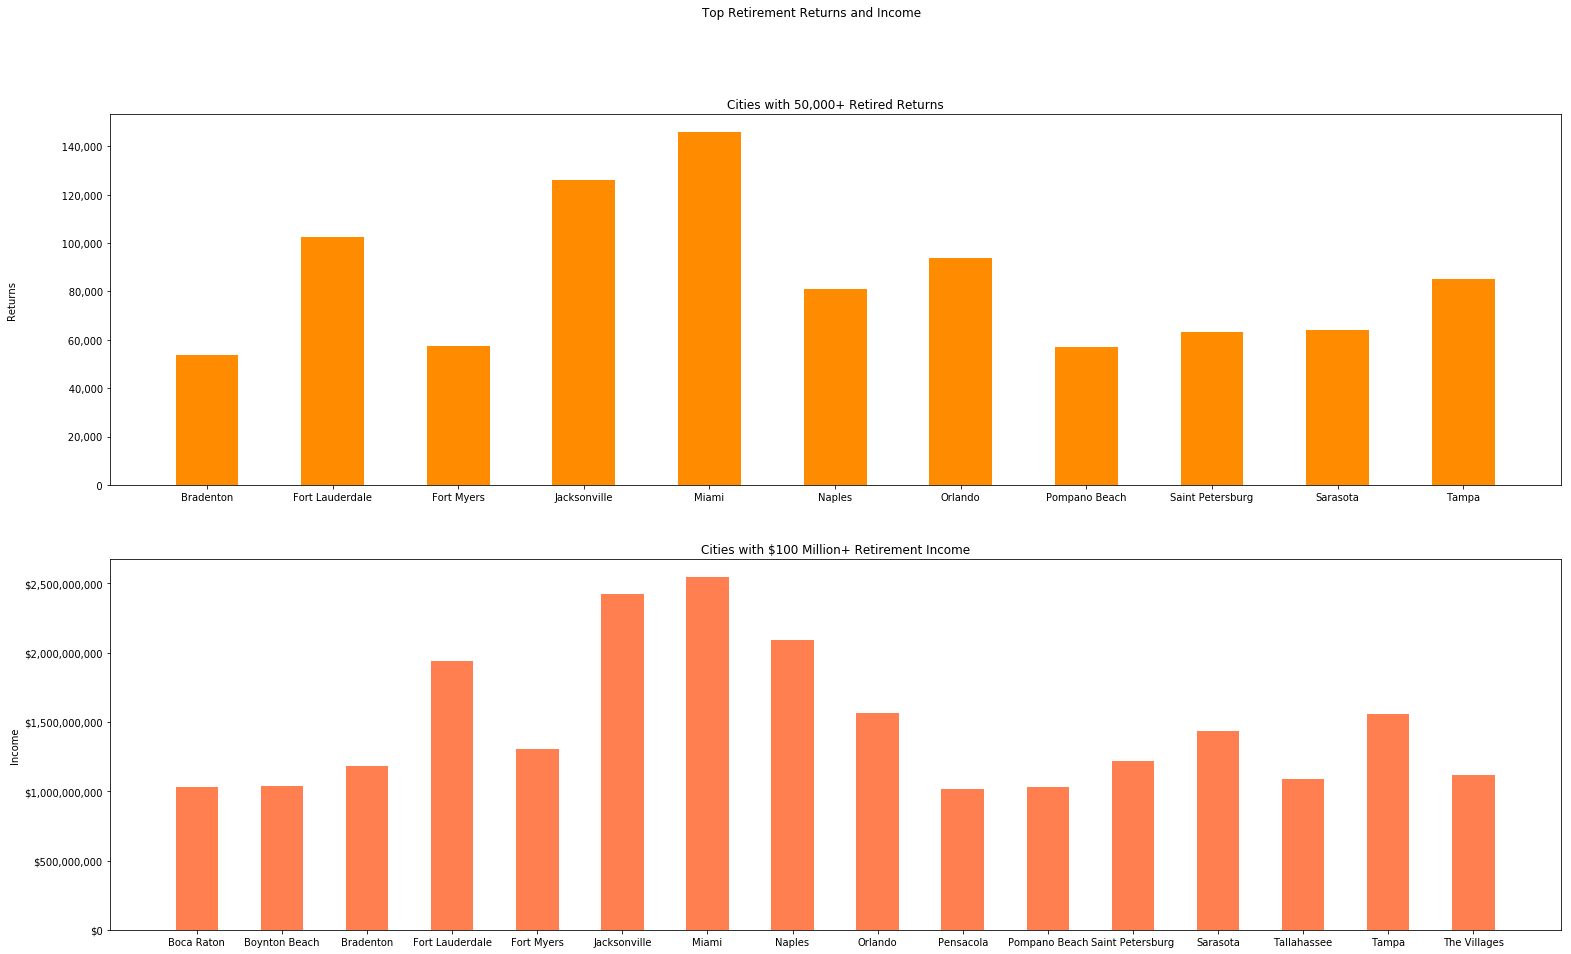

In [16]:
# Question 4 and 5 on one graph.

fig, axs=plt.subplots(2,1, figsize=(26,15))


axs[0].set_title("Cities with 50,000+ Retired Returns")
axs[0].bar(High_retire_returns["City"], High_retire_returns["Total"], color="darkorange", width=0.5)
axs[0].set_ylabel("Returns")
axs[0].set_yticklabels(['{:20,.0f}'.format(x) for x in axs[0].get_yticks()])


axs[1].set_title("Cities with $100 Million+ Retirement Income")
axs[1].bar(High_retire_amount["City"], High_retire_amount["Total"], color="coral", width=0.5)
axs[1].set_ylabel("Income")
axs[1].set_yticklabels(['${:0,.0f}'.format(x) for x in axs[1].get_yticks()])



fig.suptitle("Top Retirement Returns and Income")
fig.savefig("Graphs/Question 4 and 5 on one graph - Retirement income and returns")

In [17]:
# Question 6.
# Retirement returns based on zip codes.
# Central Florida is the main area for retirement returns.


Zip_coord=pd.read_csv('Resources/zipcode.csv', encoding="utf-8")
Zip_coord=Zip_coord[["zip", "latitude", "longitude"]]
Zip_coord=Zip_coord.rename(columns={ \
            "zip": "Zip Code", "latitude": "Latitude", "longitude": "Longitude"})


Retire_return_zip=Florida_complete[[ \
    "Zip Code",
    "City",
    "Pensions and annuities in AGI: Number of returns", 
    "Taxable Social Security benefits: Number of returns",
    "Individual retirement arrangement payments: Number of returns"]
    ]


Retire_return_zip["Total"]=( \
Retire_return_zip["Pensions and annuities in AGI: Number of returns"] + \
Retire_return_zip["Taxable Social Security benefits: Number of returns"] + \
Retire_return_zip["Individual retirement arrangement payments: Number of returns"]
)


Retire_return_zip=Retire_return_zip[["Zip Code", "City", "Total"]]
Retire_return_zip=Retire_return_zip.merge(Zip_coord, on="Zip Code")

Retire_return_zip_high=Retire_return_zip.loc[Retire_return_zip["Total"]>3000, :]

gmaps.configure(api_key=gkey)

Locations=Retire_return_zip_high[["Latitude", "Longitude"]].astype(float)
Retire_returns=Retire_return_zip_high["Total"].astype(float)

fig=gmaps.figure()

Retire_return_map=gmaps.heatmap_layer(Locations, weights=Retire_returns, 
                                 dissipating=False, max_intensity=15000,
                                 point_radius = 1)

fig.add_layer(Retire_return_map)
fig

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Figure(layout=FigureLayout(height='420px'))

In [18]:
# Question 7
# Retirement income by zip codes
# Central Florida is smaller than in returns while Naples has a big presence
# on the heat map.


Retire_amount_zip=Florida_complete[[ \
    "Zip Code",
    "City",
    "Pensions and annuities in AGI: Amount", 
    "Taxable Social Security benefits: Amount",
    "Individual retirement arrangement payments: Amount"]
    ]

Retire_amount_zip["Total"]=( \
Retire_amount_zip["Pensions and annuities in AGI: Amount"] + \
Retire_amount_zip["Taxable Social Security benefits: Amount"] + \
Retire_amount_zip["Individual retirement arrangement payments: Amount"]
)

Retire_amount_zip=Retire_amount_zip[["Zip Code", "City", "Total"]]
Retire_amount_zip=Retire_amount_zip.merge(Zip_coord, on="Zip Code")
Retire_amount_zip["Total"]=Retire_amount_zip["Total"]*1000

Retire_amount_zip_high=Retire_amount_zip.loc[Retire_amount_zip["Total"]>100000000, :]

gmaps.configure(api_key=gkey)

Locations=Retire_amount_zip_high[["Latitude", "Longitude"]].astype(float)
Retire_amount=Retire_amount_zip_high["Total"].astype(float)

fig=gmaps.figure()

Retire_amount_map=gmaps.heatmap_layer(Locations, weights=Retire_amount, 
                                 dissipating=False, max_intensity=500000000,
                                 point_radius = 1)

fig.add_layer(Retire_amount_map)
fig

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Figure(layout=FigureLayout(height='420px'))

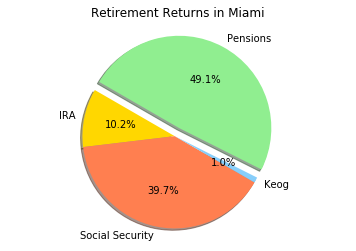

In [371]:
# Question 8
# Retirement return breakdown for top 5 cities.
# Miami breakdown

Miami_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Miami_total=Miami_sum.loc[Miami_sum["City"]=="Miami",:]
IRA_Miami=Miami_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Miami=Miami_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Miami=Miami_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Miami=Miami_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Miami+SS_Miami+Keog_Miami+Pensions_Miami)
perc_IRA_Miami = (IRA_Miami/Total)
perc_SS_Miami=(SS_Miami/Total)
perc_Keog_Miami=(Keog_Miami/Total)
perc_Pensions_Miami=(Pensions_Miami/Total)
percentage_Miami=[perc_IRA_Miami, perc_SS_Miami, perc_Keog_Miami, perc_Pensions_Miami]

labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Retirement Returns in Miami")
plt.pie(percentage_Miami, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Miami.png")
plt.show()

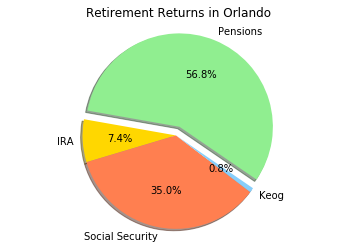

In [370]:
# Question 8 - Orlando

Orlando_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Orlando_total=Orlando_sum.loc[Orlando_sum["City"]=="Orlando",:]
IRA_Orlando=Orlando_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Orlando=Orlando_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Orlando=Orlando_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Orlando=Orlando_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Orlando+SS_Orlando+Keog_Orlando+Pensions_Orlando)
perc_IRA_Orlando= (IRA_Orlando/Total)
perc_SS_Orlando=(SS_Orlando/Total)
perc_Keog_Orlando=(Keog_Orlando/Total)
perc_Pensions_Orlando=(Pensions_Orlando/Total)
percentage_Orlando=[perc_IRA_Orlando, perc_SS_Orlando, perc_Keog_Orlando, perc_Pensions_Orlando]

labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Retirement Returns in Orlando")
plt.pie(percentage_Orlando, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Orlando.png")
plt.show()

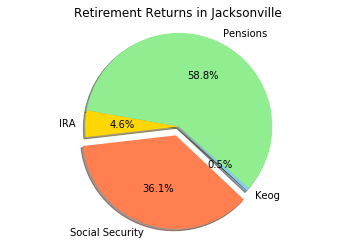

In [367]:
# Question 8 - Jacksonville

Jacksonville_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Jacksonville_total=Jacksonville_sum.loc[Jacksonville_sum["City"]=="Jacksonville",:]
IRA_Jacksonville=Jacksonville_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Jacksonville=Jacksonville_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Jacksonville=Jacksonville_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Jacksonville=Jacksonville_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Jacksonville+SS_Jacksonville+Keog_Jacksonville+Pensions_Jacksonville)

perc_IRA_Jacksonville=(IRA_Jacksonville/Total)
perc_SS_Jacksonville=(SS_Jacksonville/Total)
perc_Keog_Jacksonville=(Keog_Jacksonville/Total)
perc_Pensions_Jacksonville=(Pensions_Jacksonville/Total)
percentage_Jacksonville=[perc_IRA_Jacksonville, perc_SS_Jacksonville, perc_Keog_Jacksonville, perc_Pensions_Jacksonville]


labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Retirement Returns in Jacksonville")
plt.pie(percentage_Jacksonville, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Jacksonville.png")
plt.show()

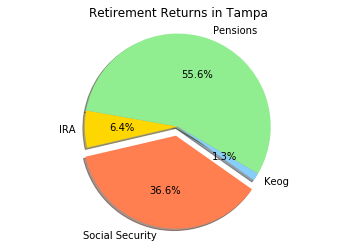

In [366]:
# Question 8 - Tampa

Tampa_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Tampa_total=Tampa_sum.loc[Tampa_sum["City"]=="Tampa",:]
IRA_Tampa=Tampa_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Tampa=Tampa_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Tampa=Tampa_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Tampa=Tampa_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Tampa+SS_Tampa+Keog_Tampa+Pensions_Tampa)

perc_IRA_Tampa=(IRA_Tampa/Total)
perc_SS_Tampa=(SS_Tampa/Total)
perc_Keog_Tampa=(Keog_Tampa/Total)
perc_Pensions_Tampa=(Pensions_Tampa/Total)
percentage_Tampa=[perc_IRA_Tampa, perc_SS_Tampa, perc_Keog_Tampa, perc_Pensions_Tampa]


labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Retirement Returns in Tampa")
plt.pie(percentage_Tampa, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Tampa.png")
plt.show()

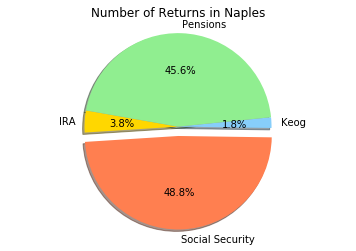

In [365]:
# Question 8 - Naples

Naples_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Naples_total=Naples_sum.loc[Naples_sum["City"]=="Naples",:]
IRA_Naples=Naples_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Naples=Naples_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Naples=Naples_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Naples=Naples_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Naples+SS_Naples+Keog_Naples+Pensions_Naples)

perc_IRA_Naples=(IRA_Naples/Total)
perc_SS_Naples=(SS_Naples/Total)
perc_Keog_Naples=(Keog_Naples/Total)
perc_Pensions_Naples=(Pensions_Naples/Total)
percentage_Naples=[perc_IRA_Naples, perc_SS_Naples, perc_Keog_Naples, perc_Pensions_Naples]


labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Number of Returns in Naples")
plt.pie(percentage_Naples, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Naples.png")
plt.show()

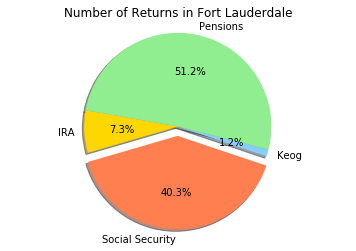

In [362]:
# Question 8 Fort Lauderdale

Ftl_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Ftl_total=Ftl_sum.loc[Ftl_sum["City"]=="Fort Lauderdale",:]
IRA_Ftl=Ftl_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Ftl=Ftl_total['Taxable Social Security benefits: Number of returns'].sum()
Keog_Ftl=Ftl_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Ftl=Ftl_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Ftl+SS_Ftl+Keog_Ftl+Pensions_Ftl)

perc_IRA_Ftl=(IRA_Ftl/Total)
perc_SS_Ftl=(SS_Ftl/Total)
perc_Keog_Ftl=(Keog_Ftl/Total)
perc_Pensions_Ftl=(Pensions_Ftl/Total)
percentage_Ftl=[perc_IRA_Ftl, perc_SS_Ftl, perc_Keog_Ftl, perc_Pensions_Ftl]


labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Number of Returns in Fort Lauderdale")
plt.pie(percentage_Ftl, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Graphs/Question 8 Retirement Number of Returns for Fort Lauderdale.png")
plt.show()

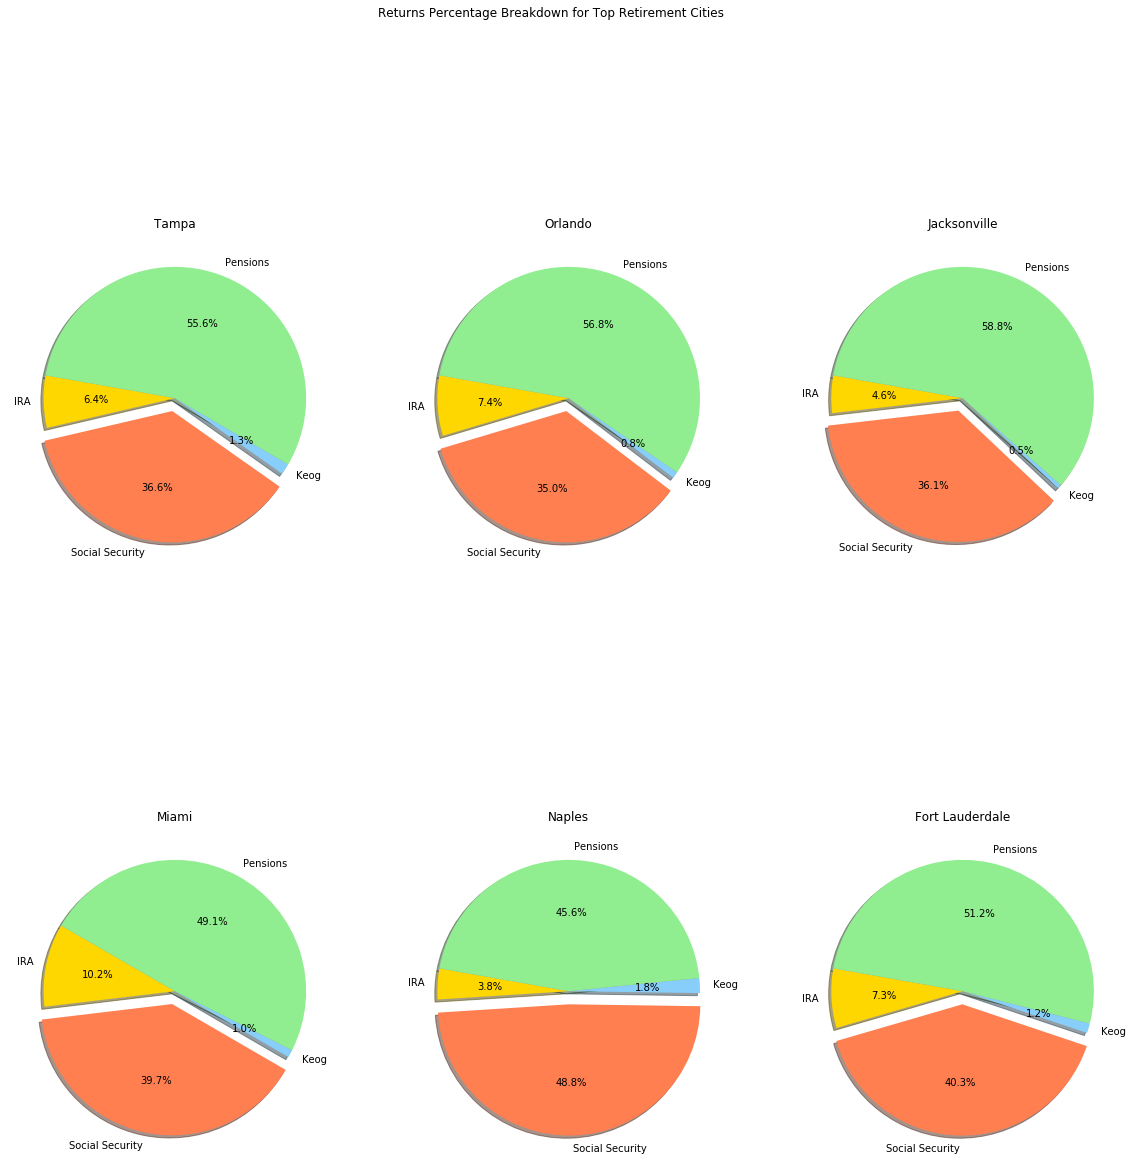

In [374]:
# Question 8 - all on one graph


fig, axs=plt.subplots(2,3, figsize=(20, 20))
axs[1,2].axis('off')

labels=["IRA", "Social Security", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

axs[1,0].set_title("Miami")
axs[1,0].pie(percentage_Miami, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=150)


axs[0,1].set_title("Orlando")
axs[0,1].pie(percentage_Orlando, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)


axs[0,2].set_title("Jacksonville")
axs[0,2].pie(percentage_Jacksonville, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)


axs[0,0].set_title("Tampa")
axs[0,0].pie(percentage_Tampa, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)


axs[1,1].set_title("Naples")
axs[1,1].pie(percentage_Naples, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)


axs[1,2].set_title("Fort Lauderdale")
axs[1,2].pie(percentage_Ftl, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)



fig.suptitle("Returns Percentage Breakdown for Top Retirement Cities")
fig.savefig("Graphs/Question 8 - All in one graph - Retirement breakdown Top 5 cities")

In [93]:
# Question 9.
# Compare top 5 city data against the entire state.
# Miami pays 8.1% of total taxes collected by the state.


Florida_tax_amount=Florida_cities.groupby(["Size of adjusted gross income"], sort=False).sum().reset_index()
Florida_tax_amount=Florida_tax_amount[[ \
            "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]]


Florida_tax_amount.insert(0, "Size of adjusted gross income", \
("Under $25,000", "$25,000 to $50,000", "$50,000 to $75,000", \
"$75,000 to $100,000", "$100,000 to $200,000", "Over $200,000"))


Florida_tax_total=Florida_tax_amount.sum()
Florida_tax_total["Size of adjusted gross income"]="Total"
Florida_tax_total=Florida_tax_total[["Size of adjusted gross income", \
          "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]]


Florida_tax_amount=Florida_tax_amount.append(Florida_tax_total, ignore_index=True)

City_tax_test=Florida_cities.groupby(["City"]).sum().reset_index()
Miami_index=City_tax_test[City_tax_test["City"]=="Miami"].index[0]
Orlando_index=City_tax_test[City_tax_test["City"]=="Orlando"].index[0]
Ftl_index=City_tax_test[City_tax_test["City"]=="Fort Lauderdale"].index[0]
Tampa_index=City_tax_test[City_tax_test["City"]=="Tampa"].index[0]
Jack_index=City_tax_test[City_tax_test["City"]=="Jacksonville"].index[0]

Top_five_tax=City_tax_test.iloc[[ \
            Miami_index, Orlando_index, Ftl_index, Tampa_index, Jack_index]
            ]


Top_five_tax=Top_five_tax[[  \
    "City", "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]
    ]


Florida_tax_total1=Florida_tax_total[[ \
        "City", "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]
        ]


Florida_tax_total1["City"]="Total"


Top_five_tax["Percentage of total returns"]= \
    Top_five_tax["Number of returns"]/Florida_tax_total1["Number of returns"]


Top_five_tax["Taxable income: Percentage amount"]= \
    Top_five_tax["Taxable income: Amount"]/Florida_tax_total1["Taxable income: Amount"]


Top_five_tax["Total taxes paid: Percentage amount"]= \
    Top_five_tax["Total taxes paid: Amount"]/Florida_tax_total1["Total taxes paid: Amount"]


Top_five_tax_display=Top_five_tax.copy()

Top_five_tax_display["Taxable income: Amount"]= \
Top_five_tax_display["Taxable income: Amount"]*1000


Top_five_tax_display["Taxable income: Amount"]=  \
    Top_five_tax_display["Taxable income: Amount"].astype(float).map("${:0,.0f}".format
    )

Top_five_tax_display["Total taxes paid: Amount"]= \
Top_five_tax_display["Total taxes paid: Amount"]*1000


Top_five_tax_display["Total taxes paid: Amount"]=  \
    Top_five_tax_display["Total taxes paid: Amount"].astype(float).map("${:0,.0f}".format
    )


Top_five_tax_display["Percentage of total returns"]=  \
    Top_five_tax_display["Percentage of total returns"].astype(float).map("{:20,.3f}%".format
    )


Top_five_tax_display["Taxable income: Percentage amount"]=  \
    Top_five_tax_display["Taxable income: Percentage amount"].astype(float).map("{:20,.3f}%".format
    )


Top_five_tax_display["Total taxes paid: Percentage amount"]=  \
    Top_five_tax_display["Total taxes paid: Percentage amount"].astype(float).map("{:20,.3f}%".format
    )


Top_five_tax_display["Number of returns"]=  \
    Top_five_tax_display["Number of returns"].astype(float).map("{:20,.0f}".format
    )


Top_five_tax_display

,City,Number of returns,Taxable income: Amount,Total taxes paid: Amount,Percentage of total returns,Taxable income: Percentage amount,Total taxes paid: Percentage amount
228,Miami,"861,990","$32,521,847,000","$1,267,500,000",0.092%,0.077%,0.081%
272,Orlando,"466,060","$15,291,798,000","$444,988,000",0.050%,0.036%,0.028%
110,Fort Lauderdale,"397,550","$20,654,426,000","$816,362,000",0.043%,0.049%,0.052%
355,Tampa,"359,410","$16,637,257,000","$469,492,000",0.039%,0.039%,0.030%
167,Jacksonville,"405,640","$14,852,767,000","$392,588,000",0.044%,0.035%,0.025%


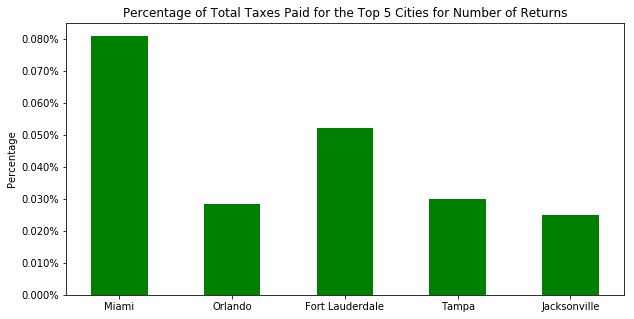

In [26]:
# Question 9 Graph 

plt.figure(figsize=(10,5))
Top_five_tax_plot=plt.bar( \
Top_five_tax["City"], Top_five_tax["Total taxes paid: Percentage amount"], color="green", width=0.5)

plt.gca().set_yticklabels(['{:.3f}%'.format(x) for x in plt.gca().get_yticks()])

plt.title("Percentage of Total Taxes Paid for the Top 5 Cities for Number of Returns")
plt.ylabel("Percentage")
plt.savefig("Graphs/Question 9 Top 5 Tax Percentages")
plt.show()

In [360]:
# Question 10
# Cities that paid $100+ million in taxes. 
# 18 cities total.

High_tax_paid=Florida_cities.loc[Florida_cities["Total taxes paid: Amount"]>100000,:]
High_tax_paid=High_tax_paid.groupby(["City"]).sum().reset_index()
High_tax_paid=High_tax_paid[["City", "Total taxes paid: Amount"]]

High_tax_paid["Total taxes paid: Amount"]=High_tax_paid["Total taxes paid: Amount"]*1000

High_tax_paid_display=High_tax_paid.copy()
High_tax_paid_display["Total taxes paid: Amount"]=  \
    High_tax_paid_display["Total taxes paid: Amount"].astype(float).map("${:20,.0f}".format
    )


High_tax_paid_display= \
    High_tax_paid_display.sort_values(by=['Total taxes paid: Amount'], ascending=False)


pd.set_option('display.max_rows', 40)
High_tax_paid_display

,City,Total taxes paid: Amount
7,Miami,"$ 1,202,988,000"
9,Naples,"$ 690,340,000"
3,Fort Lauderdale,"$ 551,471,000"
0,Boca Raton,"$ 345,928,000"
16,Tampa,"$ 339,078,000"
11,Palm Beach,"$ 292,220,000"
8,Miami Beach,"$ 290,601,000"
10,Orlando,"$ 262,073,000"
13,Pompano Beach,"$ 255,190,000"
5,Jacksonville,"$ 228,140,000"


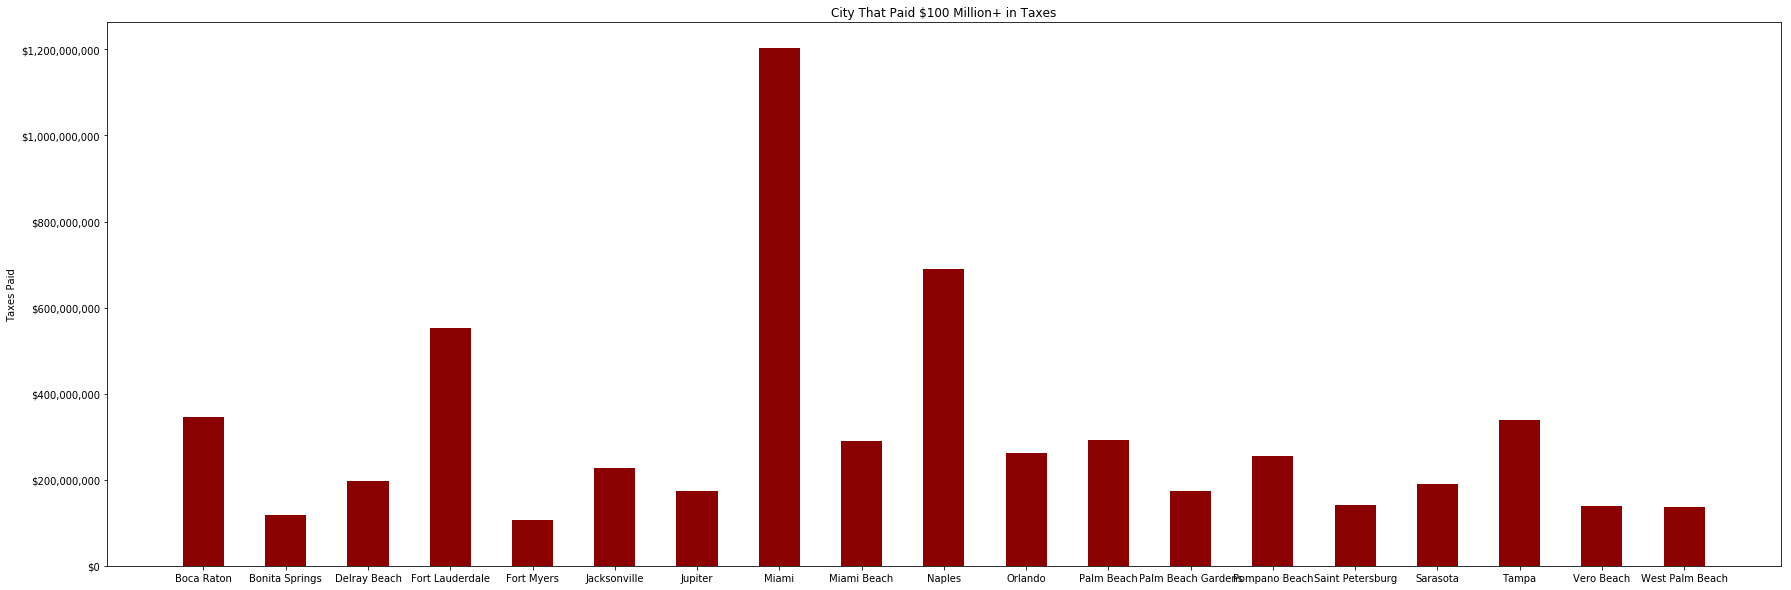

In [95]:
# Question 10 graph

plt.figure(figsize=(30,10))
High_tax_bar=plt.bar(High_tax_paid["City"], High_tax_paid["Total taxes paid: Amount"], \
                    color="darkred",  width=0.5)

plt.gca().set_yticklabels(['${:0,.0f}'.format(x) for x in plt.gca().get_yticks()])

plt.ylabel("Taxes Paid")
plt.title("City That Paid $100 Million+ in Taxes")
plt.savefig("Graphs/Question 10 100+ Million Paid")
plt.show()

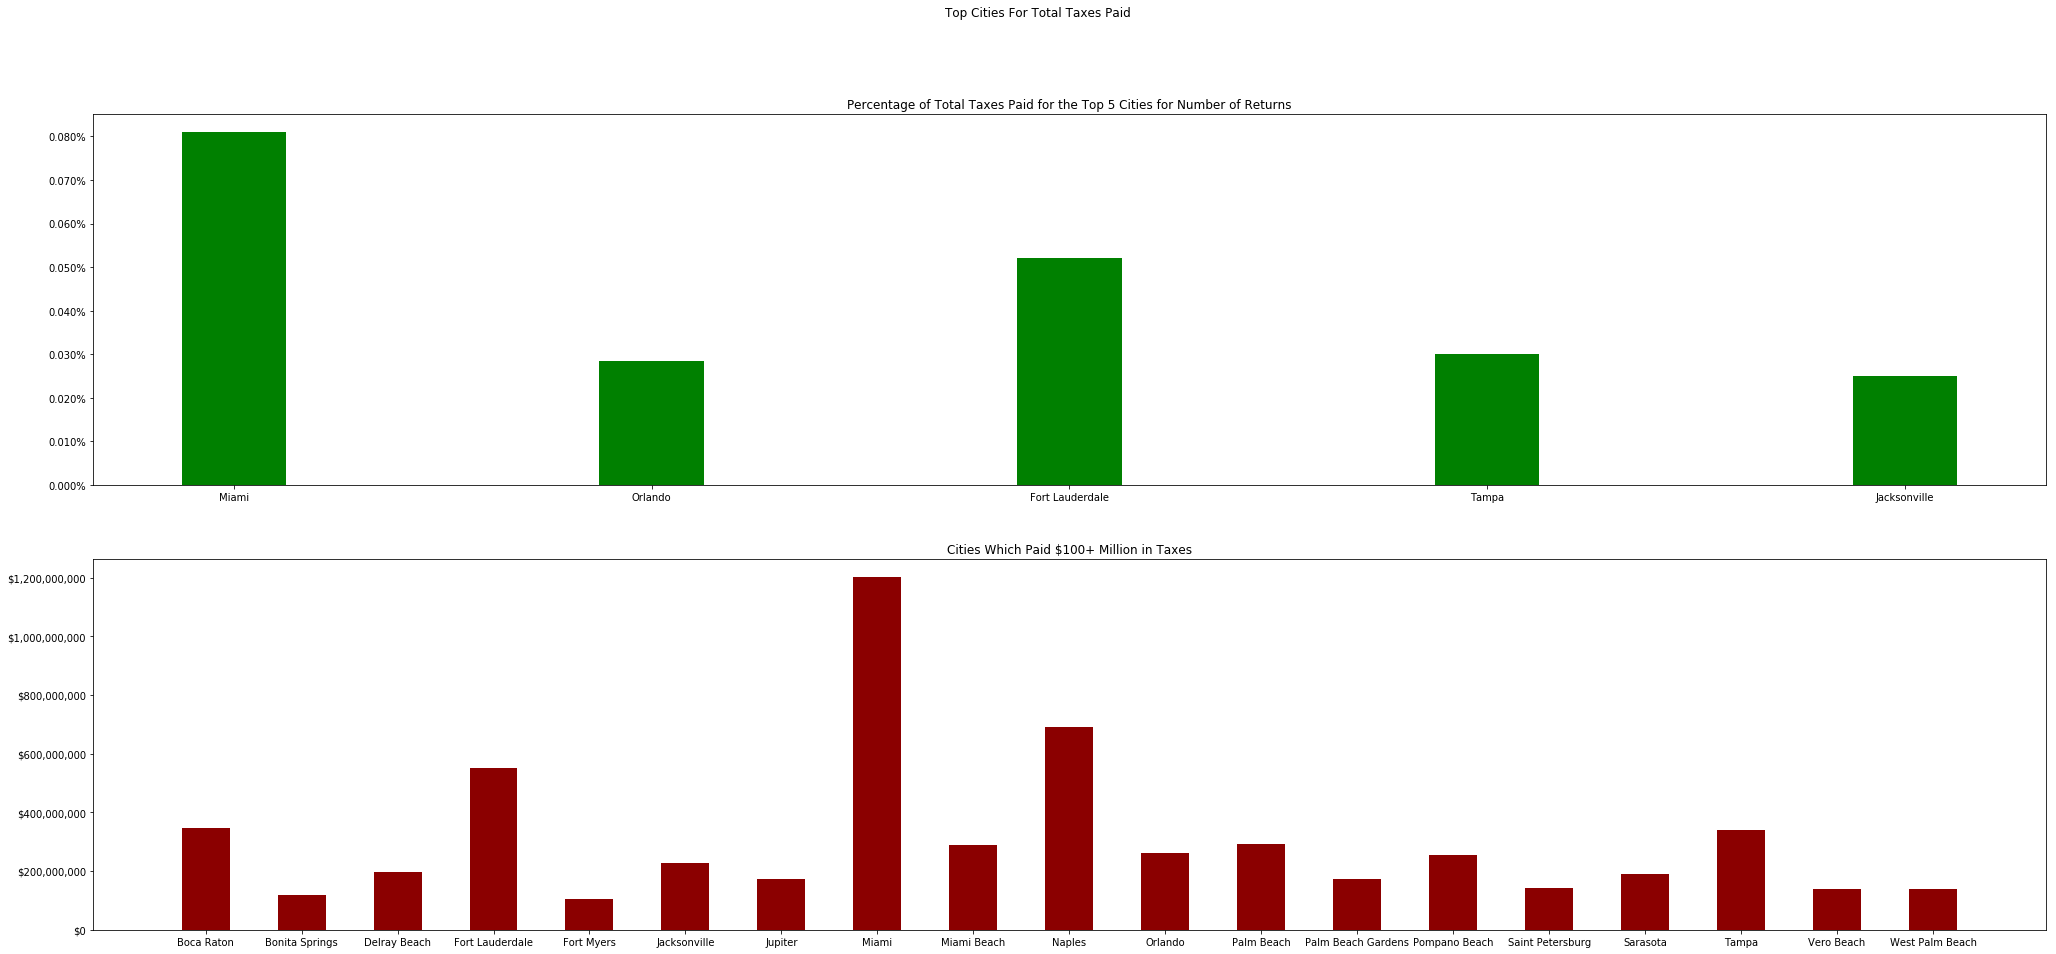

In [86]:
# Question 9 and 10 on one graph.

fig, axs=plt.subplots(2,1, figsize=(35,15))

axs[0].set_title("Percentage of Total Taxes Paid for the Top 5 Cities for Number of Returns")
axs[0].bar( \
Top_five_tax["City"], Top_five_tax["Total taxes paid: Percentage amount"], color="green", width=0.25)


axs[0].set_yticklabels(['{:0,.3f}%'.format(x) for x in axs[0].get_yticks()])

axs[1].set_title("Cities Which Paid $100+ Million in Taxes")
axs[1].bar(High_tax_paid["City"], High_tax_paid["Total taxes paid: Amount"], \
                    color="darkred",  width=0.5)


axs[1].set_yticklabels(['${:0,.0f}'.format(x) for x in axs[1].get_yticks()])


fig.suptitle("Top Cities For Total Taxes Paid")
fig.savefig("Graphs/Question 9 and 10 one graph - $100+ taxes paid, top 5 city percentage")


In [29]:
# Question 11.
# Taxes paid referenced by zip codes instead of city.
# No surprise, Miami area and Naples are the hottest on the heat map.

Zip_coord=pd.read_csv('Resources/zipcode.csv', encoding="utf-8")
Zip_coord=Zip_coord[["zip", "latitude", "longitude"]]
Zip_coord=Zip_coord.rename(columns={ \
            "zip": "Zip Code", "latitude": "Latitude", "longitude": "Longitude"})

High_tax_zip=Florida_complete.loc[Florida_complete["Total taxes paid: Amount"]>50000,:]
High_tax_zip=High_tax_zip[["Zip Code", "City", "Total taxes paid: Amount"]]

High_tax_coord=pd.merge(High_tax_zip, Zip_coord, on="Zip Code")

gmaps.configure(api_key=gkey)

Locations=High_tax_coord[["Latitude", "Longitude"]].astype(float)
Taxes_paid=High_tax_coord["Total taxes paid: Amount"].astype(float)

fig=gmaps.figure()

Tax_map= gmaps.heatmap_layer(Locations, weights=Taxes_paid, 
                                 dissipating=False, max_intensity=500000,
                                 point_radius = 1)

fig.add_layer(Tax_map)
fig

Figure(layout=FigureLayout(height='420px'))

In [333]:
# Question 12.
# Which bracket is paying the taxes?
# $200,000 + brackets pays 44% of the total taxes.

Florida_tax_amount=Florida_cities.groupby([ \
                        "Size of adjusted gross income"], sort=False).sum().reset_index()



Florida_tax_amount=Florida_tax_amount[[ \
            "Number of returns", "Taxable income: Amount", "Total taxes paid: Amount"]]



Florida_tax_amount.insert(0, "Size of adjusted gross income", \
    ("Under 25,000", "25,000 to 50,000", "50,000 to 75,000", \
    "75,000 to 100,000", "100,000 to 200,000", "Over 200,000")
    )


Florida_tax_total=Florida_tax_amount.sum()
Florida_tax_total["Size of adjusted gross income"]="Total"
Florida_tax_total=Florida_tax_total[[ \
        "Size of adjusted gross income", "Number of returns",
        "Taxable income: Amount", "Total taxes paid: Amount"
        ]
        ]



Florida_tax_amount=Florida_tax_amount.append(Florida_tax_total, ignore_index=True)
Florida_tax_amount_total=Florida_tax_amount

Florida_tax_amount_total=Florida_tax_amount
Florida_tax_amount_p=Florida_tax_amount


#Store these to prevent key errors.
Return_total=9318970.0
Tax_income_total=423897889
Tax_paid_total=15647600

Florida_tax_amount_p["Percentage of returns"]= \
    Florida_tax_amount_p["Number of returns"]/Return_total


Florida_tax_amount_p["Taxable income: Percentage"]= \
    Florida_tax_amount_p["Taxable income: Amount"]/Tax_income_total


Florida_tax_amount_p["Total taxes paid: Percentage"]= \
    Florida_tax_amount_p["Total taxes paid: Amount"]/Tax_paid_total


Florida_tax_amount_p=Florida_tax_amount_p[[ \
                "Size of adjusted gross income", "Percentage of returns", 
                "Taxable income: Percentage", "Total taxes paid: Percentage"]
                ]


Florida_tax_amount_total=Florida_tax_amount[[ \
        "Size of adjusted gross income", "Number of returns",
        "Taxable income: Amount", "Total taxes paid: Amount"]
        ]


Florida_tax_amount_total_display=Florida_tax_amount_total

Florida_tax_amount_total_display["Taxable income: Amount"]= \
Florida_tax_amount_total_display["Taxable income: Amount"]*1000


Florida_tax_amount_total_display["Taxable income: Amount"]=  \
Florida_tax_amount_total_display["Taxable income: Amount"].astype(float).map("${:0,.0f}".format
)

Florida_tax_amount_total_display["Total taxes paid: Amount"]= \
Florida_tax_amount_total_display["Total taxes paid: Amount"]*1000


Florida_tax_amount_total_display["Total taxes paid: Amount"]=  \
Florida_tax_amount_total_display["Total taxes paid: Amount"].astype(float).map("${:0,.0f}".format
)


Florida_tax_amount_total_display["Number of returns"]=  \
Florida_tax_amount_total_display["Number of returns"].astype(float).map("{:20,.0f}".format
)


Florida_tax_amount_p=Florida_tax_amount_p.drop([6])


Florida_tax_amount_total_display

C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\scott\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

,Size of adjusted gross income,Number of returns,Taxable income: Amount,Total taxes paid: Amount
0,"Under 25,000","3,805,100","$9,385,768,000","$611,185,000"
1,"25,000 to 50,000","2,340,200","$42,261,006,000","$1,339,918,000"
2,"50,000 to 75,000","1,169,570","$46,707,477,000","$1,512,749,000"
3,"75,000 to 100,000","704,210","$43,382,475,000","$1,446,640,000"
4,"100,000 to 200,000","945,710","$99,199,178,000","$3,810,276,000"
5,"Over 200,000","354,180","$182,961,985,000","$6,926,832,000"
6,Total,"9,318,970","$423,897,889,000","$15,647,600,000"


In [334]:
#Question 12 percentages dataframe.

Florida_tax_amount_p_display=Florida_tax_amount_p.copy()

Florida_tax_amount_p_display["Percentage of returns"] = \
Florida_tax_amount_p_display["Percentage of returns"].astype(float).map("{:20,.3f}%".format)


Florida_tax_amount_p_display["Taxable income: Percentage"] = \
Florida_tax_amount_p_display["Taxable income: Percentage"].astype(float).map("{:20,.3f}%".format)


Florida_tax_amount_p_display["Total taxes paid: Percentage"] = \
Florida_tax_amount_p_display["Total taxes paid: Percentage"].astype(float).map("{:20,.3f}%".format)



Florida_tax_amount_p_display

,Size of adjusted gross income,Percentage of returns,Taxable income: Percentage,Total taxes paid: Percentage
0,"Under 25,000",0.408%,0.022%,0.039%
1,"25,000 to 50,000",0.251%,0.100%,0.086%
2,"50,000 to 75,000",0.126%,0.110%,0.097%
3,"75,000 to 100,000",0.076%,0.102%,0.092%
4,"100,000 to 200,000",0.101%,0.234%,0.244%
5,"Over 200,000",0.038%,0.432%,0.443%


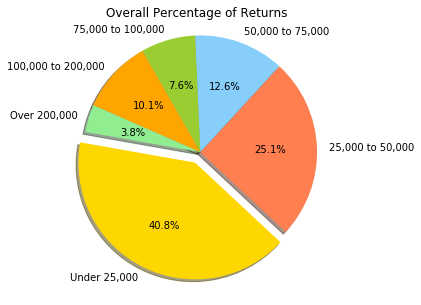

In [335]:
# Question 12 graph.
# Total percentage returns chart
# Under $25,000 is biggest bracket at 40.8%

plt.figure(figsize=(5,5))
labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist()
fares=Florida_tax_amount_p["Percentage of returns"].values.tolist()

explode=(0.1, 0, 0, 0, 0, 0)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]

plt.title("Overall Percentage of Returns")
plt.pie(Florida_tax_amount_p["Percentage of returns"], explode=explode, labels=labels, \
    colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170, labeldistance=1.1)

plt.axis('equal')
plt.savefig("Graphs/Question 12 Overall_Percentages.png")
plt.show()

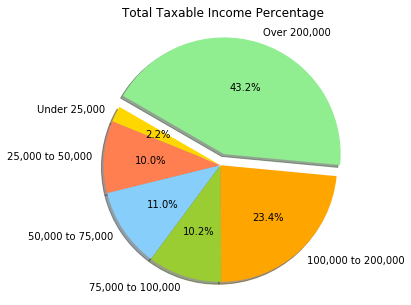

In [336]:
# Question 12 graph.
# Total taxable income chart
# $200,000+ constitudes 43.2% of total taxable income.

plt.figure(figsize=(5,5))
labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist()
fares=Florida_tax_amount_p["Taxable income: Percentage"].values.tolist()

explode=(0, 0, 0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]

plt.title("Total Taxable Income Percentage")
plt.pie(Florida_tax_amount_p["Taxable income: Percentage"], explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis('equal')
plt.savefig("Graphs/Question 12 Taxable_Income_Percentage.png")
plt.show()

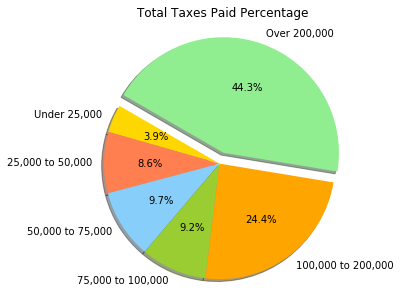

In [337]:
# Question 12 graph.
# Total taxes paid percentage chart.
# $200,000+ pays out 44.3% of total taxes paid.

plt.figure(figsize=(5,5))
labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist()
fares=Florida_tax_amount_p["Total taxes paid: Percentage"].values.tolist()

explode=(0, 0, 0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]

plt.title("Total Taxes Paid Percentage")
plt.pie(Florida_tax_amount_p["Total taxes paid: Percentage"], explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis('equal')
plt.savefig("Graphs/Question 12 Taxes_Paid_Percentage.png")
plt.show()

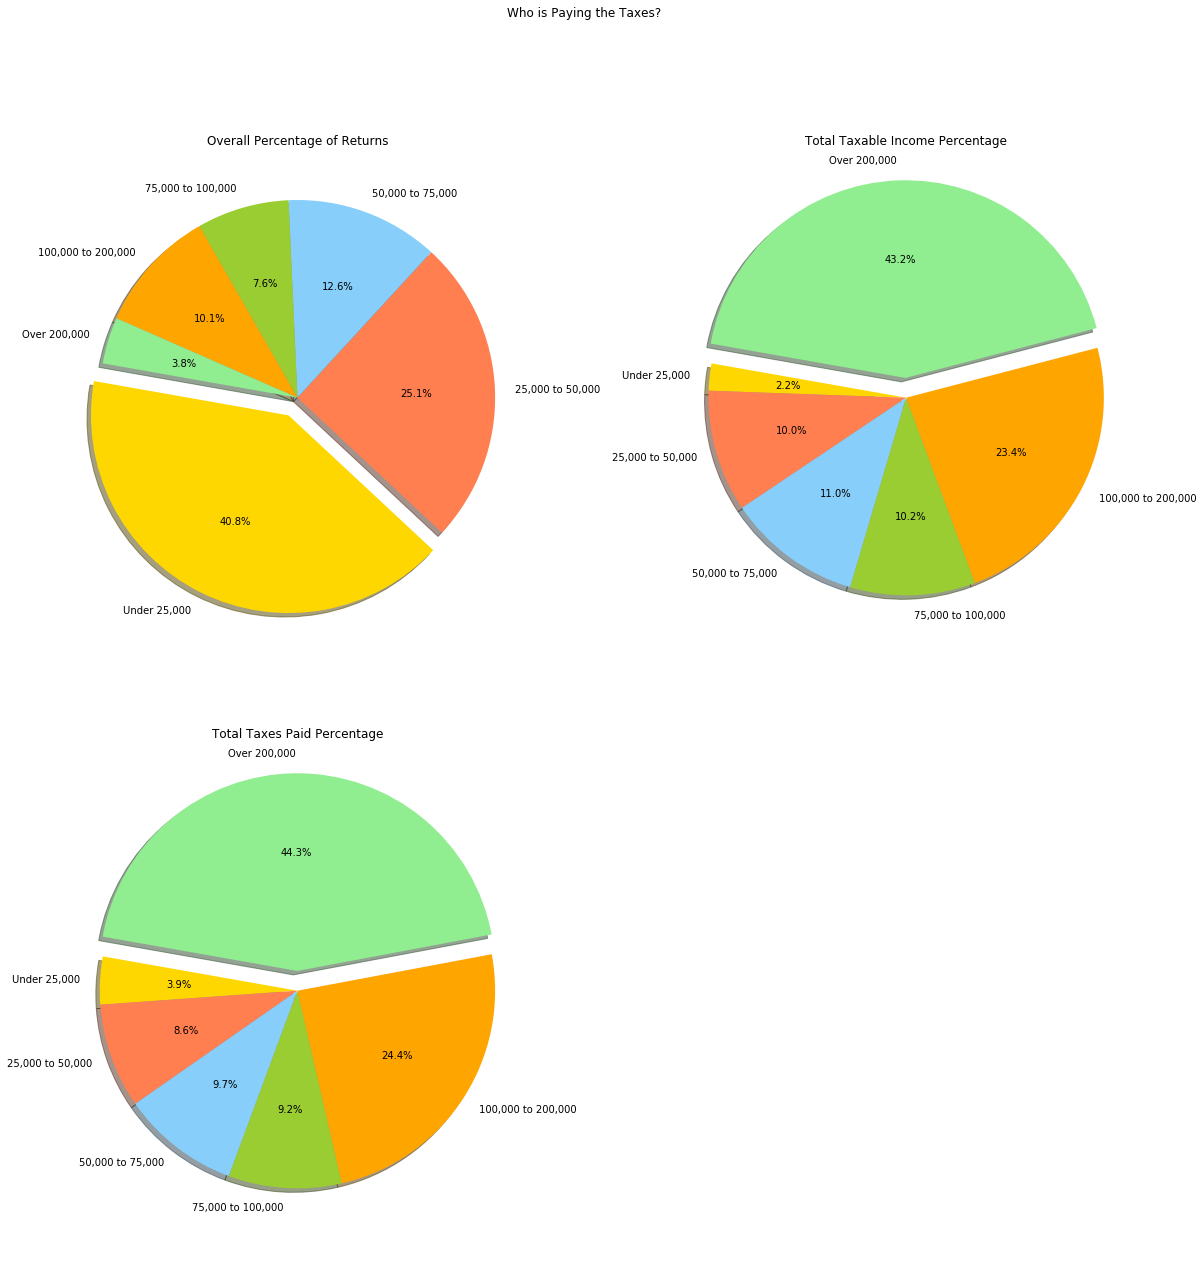

In [338]:
# Question 12 - All graphs together

explode=(0.1, 0, 0, 0, 0, 0)
explode1=(0, 0, 0, 0, 0, 0.1)
colors=["gold", "coral", "lightskyblue", "yellowgreen", "orange", "lightgreen"]
fig, axs=plt.subplots(2, 2, figsize=(20,20))

axs[0,0].set_title("Overall Percentage of Returns")
axs[0,0].pie(Florida_tax_amount_p["Percentage of returns"],
          labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist(),
          explode=explode, startangle=170, autopct="%1.1f%%", colors=colors, shadow=True)

          
axs[0,1].set_title("Total Taxable Income Percentage")
axs[0,1].pie(Florida_tax_amount_p["Taxable income: Percentage"],
          labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist(),
          explode=explode1, startangle=170, autopct="%1.1f%%", colors=colors, shadow=True)
  
    
axs[1,0].set_title("Total Taxes Paid Percentage")
axs[1,0].pie(Florida_tax_amount_p["Total taxes paid: Percentage"],
          labels=Florida_tax_amount_p["Size of adjusted gross income"].values.tolist(),
          explode=explode1, startangle=170, autopct="%1.1f%%", colors=colors, shadow=True)
        

axs[1,1].axis('off')
    
fig.suptitle("Who is Paying the Taxes?")
fig.savefig("Graphs/Question 12 All graphs together")

In [339]:
# Question 13. 
# Compare total income to total taxable income across the brackets


Florida_cities_total=Florida_cities.groupby(["Size of adjusted gross income"], sort=False).sum().reset_index()
Florida_cities_total=Florida_cities_total.sum()
Florida_cities_total["City"]="Total"
Florida_cities_total=Florida_cities_total[["City", "Number of returns",  \
                        "Taxable income: Amount", "Total taxes paid: Amount"]]

Income_compare=Florida_cities.groupby(["Size of adjusted gross income"], sort=False).sum().reset_index()
Income_compare=Income_compare[[ \
"Size of adjusted gross income", "Total income: Amount", "Taxable income: Amount", "Total taxes paid: Amount"]]


Income_compare["Percentage of taxable income"]=( \
            Income_compare["Taxable income: Amount"]/Income_compare["Total income: Amount"])


Income_compare["Percentage of non-taxable income"]=1-Income_compare["Percentage of taxable income"]


Income_compare["Percentage of income taxed"]=(  \
            Income_compare["Total taxes paid: Amount"]/Income_compare["Taxable income: Amount"])



Income_compare_display=Income_compare.copy()

Income_compare_display["Taxable income: Amount"]= \
Income_compare_display["Taxable income: Amount"]*1000


Income_compare_display["Taxable income: Amount"]=  \
Income_compare_display["Taxable income: Amount"].astype(float).map("${:0,.0f}".format
)


Income_compare_display["Total taxes paid: Amount"]= \
Income_compare_display["Total taxes paid: Amount"]*1000


Income_compare_display["Total taxes paid: Amount"]=  \
Income_compare_display["Total taxes paid: Amount"].astype(float).map("${:0,.0f}".format
)


Income_compare_display["Total income: Amount"]= \
Income_compare_display["Total income: Amount"]*1000


Income_compare_display["Total income: Amount"]=  \
Income_compare_display["Total income: Amount"].astype(float).map("${:0,.0f}".format
)


Income_compare_display["Percentage of taxable income"]=  \
Income_compare_display["Percentage of taxable income"].astype(float).map("{:20,.3f}%".format
)


Income_compare_display["Percentage of non-taxable income"]=  \
Income_compare_display["Percentage of non-taxable income"].astype(float).map("{:20,.3f}%".format
)


Income_compare_display["Percentage of income taxed"]=  \
Income_compare_display["Percentage of income taxed"].astype(float).map("{:20,.3f}%".format
)


Income_compare_display

,Size of adjusted gross income,Total income: Amount,Taxable income: Amount,Total taxes paid: Amount,Percentage of taxable income,Percentage of non-taxable income,Percentage of income taxed
0,"Under 25,000","$50,167,659,000","$9,385,768,000","$611,185,000",0.187%,0.813%,0.065%
1,"25,000 to 50,000","$84,929,165,000","$42,261,006,000","$1,339,918,000",0.498%,0.502%,0.032%
2,"50,000 to 75,000","$72,539,100,000","$46,707,477,000","$1,512,749,000",0.644%,0.356%,0.032%
3,"75,000 to 100,000","$61,594,575,000","$43,382,475,000","$1,446,640,000",0.704%,0.296%,0.033%
4,"100,000 to 200,000","$129,097,708,000","$99,199,178,000","$3,810,276,000",0.768%,0.232%,0.038%
5,"Over 200,000","$208,787,183,000","$182,961,985,000","$6,926,832,000",0.876%,0.124%,0.038%


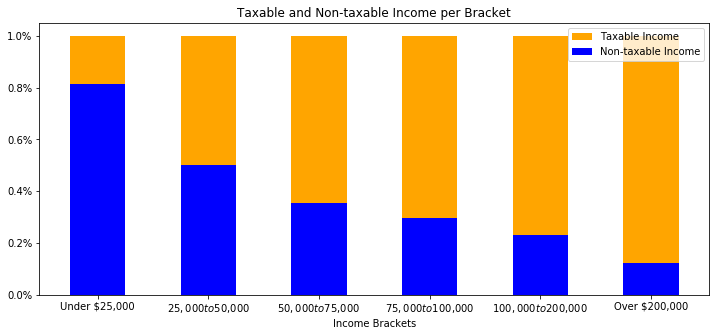

In [98]:
# Question 13 Graph
# Taxable vs non-taxable income

plt.figure(figsize=(12,5))
tax=plt.bar(Income_compare["Size of adjusted gross income"],  \
        Income_compare["Percentage of taxable income"], color="orange", width=0.5, \
        bottom=Income_compare["Percentage of non-taxable income"])

nontax=plt.bar(Income_compare["Size of adjusted gross income"],  \
        Income_compare["Percentage of non-taxable income"], color="blue", width=0.5)

plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()])

plt.title("Taxable and Non-taxable Income per Bracket")
plt.xlabel("Income Brackets")
plt.legend((tax[0], nontax[0]), ("Taxable Income", "Non-taxable Income"), loc="upper right")
plt.savefig("Graphs/Question 13 Taxed vs Nontaxed")
plt.show()

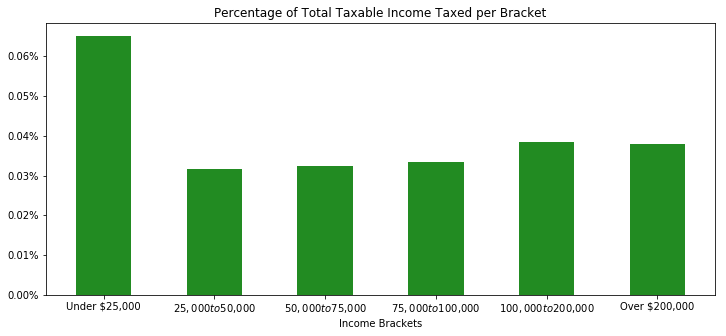

In [68]:
# Question 12 Graph
# Total taxable income taxed per bracket.

plt.figure(figsize=(12,5))
Income_tax=plt.bar(Income_compare["Size of adjusted gross income"], \
        Income_compare["Percentage of income taxed"], color="forestgreen", width=0.5)

plt.gca().set_yticklabels(['{:.2f}%'.format(x) for x in plt.gca().get_yticks()])

plt.title("Percentage of Total Taxable Income Taxed per Bracket")
plt.xlabel("Income Brackets")
plt.savefig("Graphs/Question 12 Income Taxed per Bracket")
plt.show()

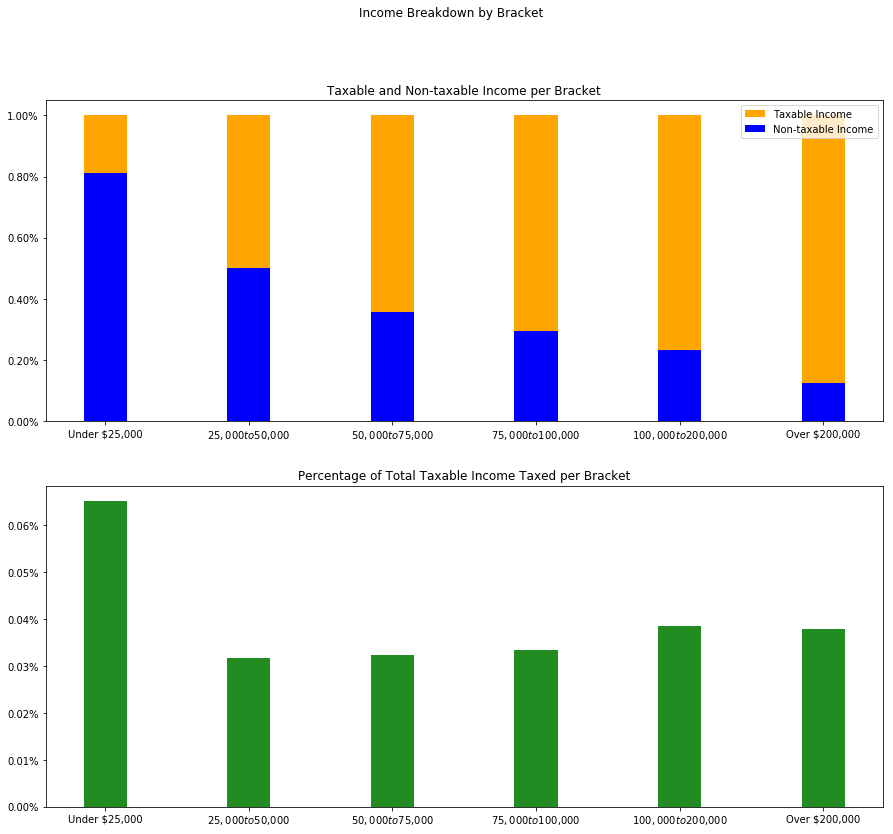

In [117]:
# Question 12 and 13 on one graph.

fig, axs=plt.subplots(2,1, figsize=(15,13))

axs[1].set_title("Percentage of Total Taxable Income Taxed per Bracket")
axs[1].bar(Income_compare["Size of adjusted gross income"], 
        Income_compare["Percentage of income taxed"], color="forestgreen", width=0.3)


axs[1].set_yticklabels(['{:.2f}%'.format(x) for x in axs[1].get_yticks()])

axs[0].set_title("Taxable and Non-taxable Income per Bracket")
axs[0].bar(Income_compare["Size of adjusted gross income"],  
        Income_compare["Percentage of taxable income"], color="orange", width=0.3, 
        bottom=Income_compare["Percentage of non-taxable income"], label="Taxable Income")


axs[0].bar(Income_compare["Size of adjusted gross income"],  
        Income_compare["Percentage of non-taxable income"], 
        color="blue", width=0.3, label="Non-taxable Income")


axs[0].set_yticklabels(['{:.2f}%'.format(x) for x in axs[0].get_yticks()])
axs[0].legend(loc="upper right")


fig.suptitle("Income Breakdown by Bracket")
fig.savefig("Graphs/Questions 12 and 13 on one graph")

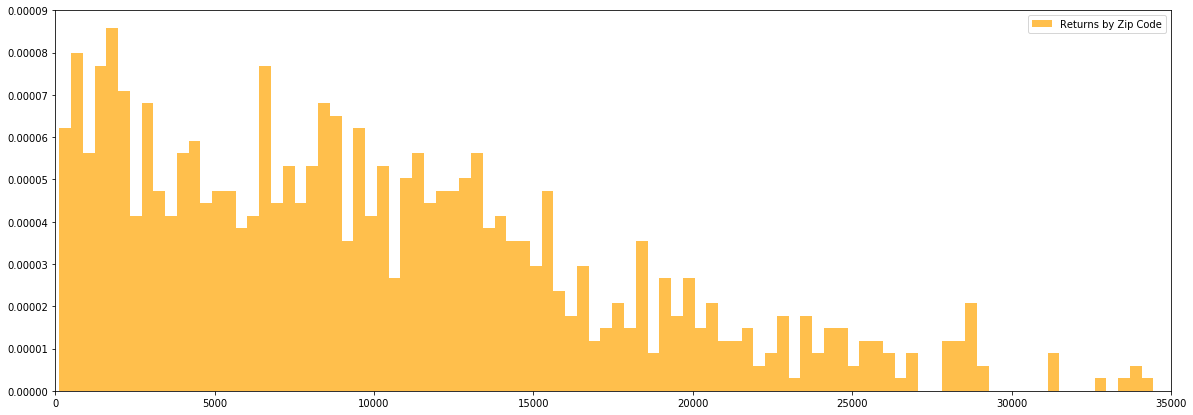

In [121]:
#Question 14.  Statistical analysis - compare city to zip code number of returns
# Zip Code Histogram.  

#Ho:  City and Zip code returns have the same distribution
#Ha:  City and Zip Code returns do not have the same distribution


Zip_sum=Florida_complete.groupby(["Zip Code"]).sum().reset_index()

plt.figure(figsize=(20,7))
Zip_sum_graph=plt.hist( \
Zip_sum["Number of returns"], 100, density=True, alpha=0.7, label="Returns by Zip Code", color="orange"
)



plt.xlim((0,35000))
plt.legend()
plt.show()

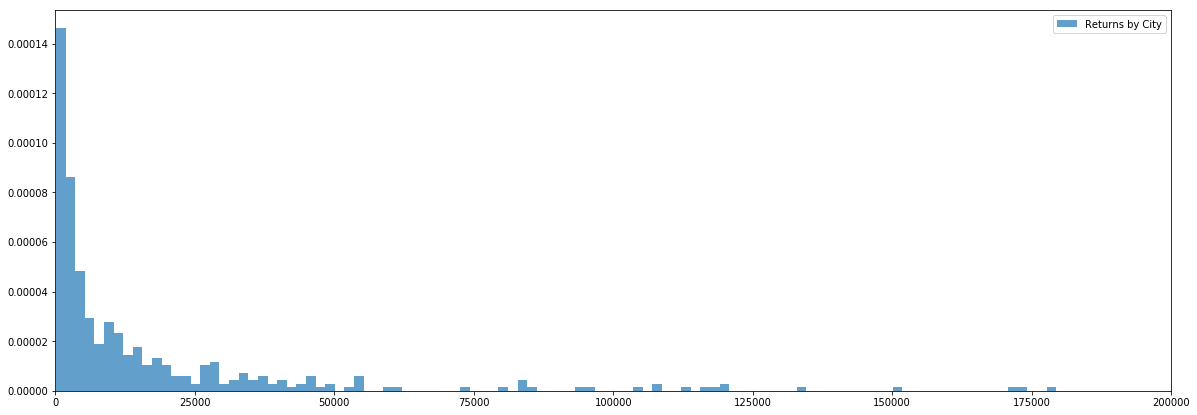

In [122]:
#Question 13.
#City histogram

City_sum=Florida_complete.groupby(["City"]).sum().reset_index()

plt.figure(figsize=(20,7))
City_sum_graph=plt.hist(  \
    City_sum["Number of returns"], 500, density=True, alpha=0.7, label="Returns by City")
plt.xlim((0,200000))
plt.legend()
plt.show()

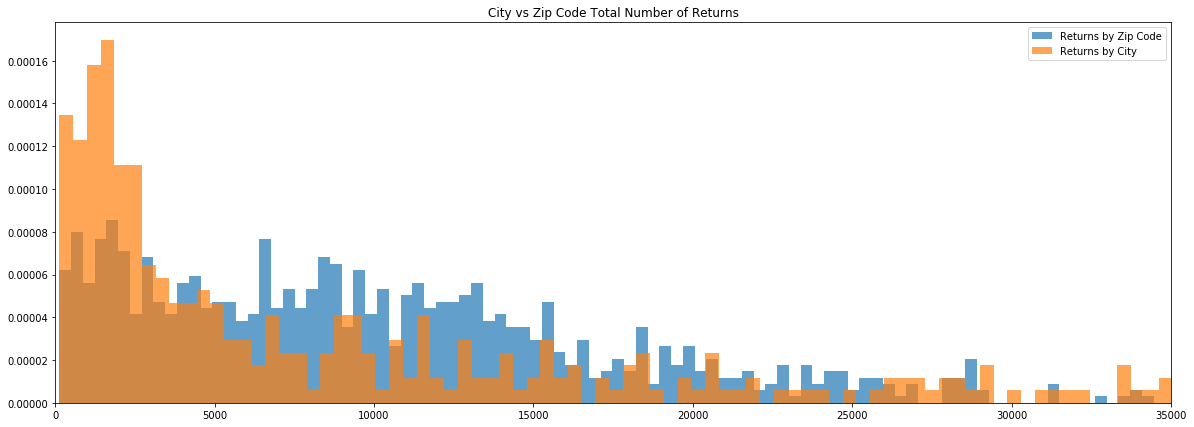

In [282]:
# Question 13.
# Combined Histogram  - Just use this graph.

plt.figure(figsize=(20,7))
Zip_sum_graph=plt.hist( \
     Zip_sum["Number of returns"], 100, density=True, alpha=0.7, label="Returns by Zip Code")


City_sum_graph=plt.hist(  \
    City_sum["Number of returns"], 2000, density=True, alpha=0.7, label="Returns by City")



plt.xlim((0,35000))
plt.title("City vs Zip Code Total Number of Returns")
plt.legend()
plt.savefig("Graphs/Question 13 City vs Zip Codes histogram")
plt.show()

In [124]:
# Question 13.
# Testing the null hypothesis.
# Reject null hypothesis.  City and Zip code returns have different distributions.

# City number of returns could be a gamma or pareto distribution but do not have
# enough time to determine.  If found, could be used for further analysis and predictions.

Zip_stats=Zip_sum["Number of returns"]
City_stats=City_sum["Number of returns"]

stats.ttest_ind(City_stats, Zip_stats, equal_var=False)

Ttest_indResult(statistic=4.050761073397962, pvalue=6.132268215097436e-05)

In [125]:
Zip_stats=Zip_sum["Number of returns"]
Zip_stats.describe()

count      917.000000
mean     10162.453653
std       7392.335667
min        130.000000
25%       4160.000000
50%       8880.000000
75%      14260.000000
max      37030.000000
Name: Number of returns, dtype: float64

In [126]:
City_stats=City_sum["Number of returns"]
City_stats.describe()

count       397.000000
mean      23473.476071
std       65293.256512
min         130.000000
25%        1820.000000
50%        6050.000000
75%       19040.000000
max      861990.000000
Name: Number of returns, dtype: float64

In [262]:
# Question 14.
# Regression model.  Do not use.



Florida_upper_analysis=Florida_complete.loc[ \
            Florida_complete["Size of adjusted gross income"]=="Over $200,000",:]

Florida_upper_analysis=Florida_upper_analysis.drop(["Size of adjusted gross income"], axis=1)

for col in Florida_upper_analysis.columns:
    if "Amount" in col:
        Florida_upper_analysis[col]= Florida_upper_analysis[col]*1000
        
Florida_upper_analysis_columns=[col for col in Florida_upper_analysis.columns if 'Amount' in col]

Florida_upper_analysis=Florida_upper_analysis[Florida_upper_analysis_columns]

Florida_upper_analysis_display=Florida_upper_analysis.copy()

for col in Florida_upper_analysis_display.columns:
    if "Amount" in col:
        Florida_upper_analysis_display[col]= \
        Florida_upper_analysis_display[col].astype(float).map("${:0,.0f}".format)
  


y=Florida_upper_analysis["Taxable income: Amount"]
x=Florida_upper_analysis.loc[:, Florida_upper_analysis.columns != "Taxable income: Amount"]

y_df=pd.DataFrame(y)
x_df=pd.DataFrame(x)

y_train=y[-817:]
y_test=y[:-817]

x_train=x[-817:]
x_test=x[:-817]

regressor=LinearRegression()
regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)

score=r2_score(y_test, y_pred)
print(score)

0.9988010375066717


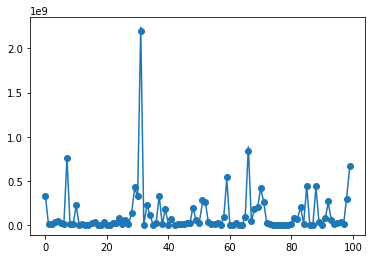

In [245]:
Predictions=pd.DataFrame(list(y_pred))
Original=pd.DataFrame(list(y_test))

x=np.arange(0, 100, 1)

plt.scatter(x, Original[0])
plt.plot(x, Predictions[0])

In [240]:
# Question 14
# What variables are significant towards taxable income.

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):

    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        #backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


result = stepwise_selection(x_df, y_df)


C:\Users\scott\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\scott\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\scott\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\scott\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Add  Real estate taxes: Amount      with p-value 0.0
Add  Total tax liability: Amount    with p-value 0.0
Add  Total income: Amount           with p-value 3.88267e-72
Drop Real estate taxes: Amount      with p-value 0.077086
Add  State and local general sales taxes: Amount with p-value 2.31675e-39
Add  Total itemized deductions: Amount of AGI with p-value 9.36384e-82
Add  Total taxes paid: Amount       with p-value 4.90908e-63
Add  Total charitable contributions: Amount with p-value 5.02699e-39
Add  Total tax credits: Amount      with p-value 7.69042e-29
Add  Taxable Social Security benefits: Amount with p-value 1.67943e-24
Add  Salaries and wages in AGI: Amount with p-value 2.37583e-20
Add  Total additional Medicare tax: Amount with p-value 1.77533e-18
Drop Total income: Amount           with p-value 0.719458
Add  State and local income taxes: Amount with p-value 4.05579e-18
Add  Total statuory adjustments: Amount with p-value 3.95864e-13
Add  Domestic production activities deduction:

In [287]:
#Stepwise for total taxes paid.

Florida_upper_analysis=Florida_complete.loc[ \
            Florida_complete["Size of adjusted gross income"]=="Over $200,000",:]


Florida_upper_analysis=Florida_upper_analysis.drop(["Size of adjusted gross income"], axis=1)

Florida_upper_analysis_columns=[col for col in Florida_upper_analysis.columns if 'Amount' in col]
Florida_upper_analysis=Florida_upper_analysis[Florida_upper_analysis_columns]

for col in Florida_upper_analysis.columns:
    if "Amount" in col:
        Florida_upper_analysis[col]= Florida_upper_analysis[col]*1000

        
y=Florida_upper_analysis["Total taxes paid: Amount"]
x=Florida_upper_analysis.loc[:, Florida_upper_analysis.columns != "Total taxes paid: Amount"]

y_df=pd.DataFrame(y)
x_df=pd.DataFrame(x)

results_tax=stepwise_selection(x_df, y_df)

Add  Net investment income tax: Amount with p-value 0.0
Add  Real estate taxes: Amount      with p-value 1.32394e-297
Add  State and local income taxes: Amount with p-value 1.83671e-212
Add  Total tax payments: Amount     with p-value 2.25989e-49
Add  Taxable income: Amount         with p-value 1.13118e-31
Add  Total income: Amount           with p-value 1.50939e-51
Add  Total statuory adjustments: Amount with p-value 7.06741e-12
Add  Domestic production activities deduction: Amount with p-value 1.37338e-10
Add  Self-employment tax: Amount    with p-value 8.83102e-20
Add  Total additional Medicare tax: Amount with p-value 2.37153e-09
Add  Self-employed health insurance deduction: Amount with p-value 1.93798e-07
Add  State and local general sales taxes: Amount with p-value 5.90951e-07
Add  Income tax: Amount             with p-value 1.3472e-10
Add  Alternative minimum tax: Amount with p-value 2.65869e-07
Add  Foreign tax credit: Amount     with p-value 1.45513e-08
Add  ncome tax before 

In [289]:
# Stepwise for total income.

Florida_upper_analysis=Florida_complete.loc[ \
            Florida_complete["Size of adjusted gross income"]=="Over $200,000",:]


Florida_upper_analysis=Florida_upper_analysis.drop(["Size of adjusted gross income"], axis=1)

Florida_upper_analysis_columns=[col for col in Florida_upper_analysis.columns if 'Amount' in col]
Florida_upper_analysis=Florida_upper_analysis[Florida_upper_analysis_columns]

for col in Florida_upper_analysis.columns:
    if "Amount" in col:
        Florida_upper_analysis[col]= Florida_upper_analysis[col]*1000

        
y=Florida_upper_analysis["Total income: Amount"]
x=Florida_upper_analysis.loc[:, Florida_upper_analysis.columns != "Total income: Amount"]

y_df=pd.DataFrame(y)
x_df=pd.DataFrame(x)

results_income=stepwise_selection(x_df, y_df)

Add  Real estate taxes: Amount      with p-value 0.0
Add  Taxable income: Amount         with p-value 0.0
Add  Income tax: Amount             with p-value 1.51222e-116
Add  Total itemized deductions: Amount with p-value 7.54365e-59
Drop Real estate taxes: Amount      with p-value 0.862123
Add  State and local general sales taxes: Amount with p-value 3.40955e-63
Add  Pensions and annuities in AGI: Amount with p-value 6.70817e-50
Add  Total additional Medicare tax: Amount with p-value 4.22639e-20
Add  Salaries and wages in AGI: Amount with p-value 1.10503e-19
Add  Total tax credits: Amount      with p-value 1.71148e-20
Add  Overpayments refunded: Amount  with p-value 2.28739e-15
Add  Partnership/S-corp net income: Amount with p-value 8.58837e-12
Add  Tax due at time of filing: Amount with p-value 1.49185e-09
Add  Total charitable contributions: Amount with p-value 8.38537e-11
Add  Taxable Social Security benefits: Amount with p-value 3.07725e-12
Drop Pensions and annuities in AGI: Amount

In [353]:
Sig_taxable_income=pd.DataFrame(result)
Sig_taxable_income=Sig_taxable_income.rename( \
                    columns= {0: "Variables with 95%+ Significance for Taxable Income"}
                    )

pd.option_context('display.max_rows', 25, 'display.max_columns', 5) 

Sig_taxable_income

,Variables with 95%+ Significance for Taxable Income
0,Total tax liability: Amount
1,Total itemized deductions: Amount of AGI
2,Total taxes paid: Amount
3,Total charitable contributions: Amount
4,Total tax credits: Amount
5,Taxable Social Security benefits: Amount
6,Salaries and wages in AGI: Amount
7,Total additional Medicare tax: Amount
8,State and local income taxes: Amount
9,Total statuory adjustments: Amount


In [349]:
Sig_total_income=pd.DataFrame(results_income)
Sig_total_income=Sig_total_income.rename( \
                    columns= {0: "Variables with 95%+ Significance for Total Income"}
                    )


Sig_total_income

,Variables with 95%+ Significance for Total Income
0,Income tax: Amount
1,Total itemized deductions: Amount
2,State and local general sales taxes: Amount
3,Total additional Medicare tax: Amount
4,Salaries and wages in AGI: Amount
5,Total tax credits: Amount
6,Overpayments refunded: Amount
7,Partnership/S-corp net income: Amount
8,Tax due at time of filing: Amount
9,Total charitable contributions: Amount


In [359]:
Sig_tax_paid=pd.DataFrame(results_tax)
Sig_tax_paid=Sig_tax_paid.rename( \
                    columns= {0: "Variables w/ 95%+ Significance for Total Taxes Paid"}
                    )

pd.set_option('display.max_rows', 40)
Sig_tax_paid

,Variables w/ 95%+ Significance for Total Taxes Paid
0,Real estate taxes: Amount
1,State and local income taxes: Amount
2,Total tax payments: Amount
3,Taxable income: Amount
4,Total income: Amount
5,Total statuory adjustments: Amount
6,Domestic production activities deduction: Amount
7,Total additional Medicare tax: Amount
8,Self-employed health insurance deduction: Amount
9,State and local general sales taxes: Amount
